In [1]:
import platform
print(platform.python_version())
# The Python version I used is "3.12.3".

3.12.3


In [2]:
from importlib.metadata import version
print(version('pandas')) # pandas 2.2.2
print(version('numpy')) # numpy 1.26.4

2.2.2
1.26.4


In [3]:
import pandas as pd
import numpy as np

# Data Preprocessing

### Load datasets

In [4]:
# Load data
data1 = pd.read_csv("Card Transactions 2014.csv")
data2 = pd.read_csv("Card Transactions 2015-2016.csv")
data3 = pd.read_csv("Card Transactions 2016-2017.csv")

### Explore first and last few rows of data

In [5]:
data1.head()

Service Area             Account Description            Creditor  \
0  Childrens Services                     IT Services       123-REG.CO.UK   
1  Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4  Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   

  Transaction Date  JV Reference     JV Date  JV Value  
0       23/04/2014            93  20/05/2014    143.81  
1       03/04/2014           111  20/05/2014  6,000.00  
2       02/04/2014             6  20/05/2014    309.38  
3       02/04/2014             7  20/05/2014    218.76  
4       15/04/2014           381  20/05/2014       306

In [6]:
data1.tail()

Service Area             Account Description  \
4557      Adults and Communities                         Postage   
4558  Children's Family Services  Equipment and Materials Purcha   
4559  Children's Family Services  Equipment and Materials Purcha   
4560  Children's Family Services           Books-CDs-Audio-Video   
4561  Children's Family Services  Other Transfer Payments to Soc   

                 Creditor Transaction Date  JV Reference     JV Date JV Value  
4557    WWW.ROYALMAIL.COM       23/02/2015          5002  16/03/2015      124  
4558   WWW.SMYTHSTOYS.COM       20/02/2015          5188  16/03/2015    89.96  
4559  WWW.TTS-GROUPS.CO.U       06/02/2015          5207  16/03/2015   445.92  
4560     WWW.WILDGOOSE.AC       09/02/2015          5271  16/03/2015   407.44  
4561  www.1st4footballtic       06/02/2015          4895  16/03/2015      153

In [7]:
data2.head()

Service Area             Account Description  \
0                   Assurance          Miscellaneous Expenses   
1  Children's Family Services          Miscellaneous Expenses   
2  Children's Family Services        E19 - Learning Resources   
3  Children's Family Services  Equipment and Materials Purcha   
4  Children's Family Services                     Subsistence   

                Creditor Journal Date  Journal Reference  Total  
0  43033820 COSTA COFFEE   18/08/2015             5043.0      2  
1  99 PLUS DISCOUNT MART   08/06/2015             4184.0  29.97  
2         99P STORES LTD   07/12/2015             6278.0  34.65  
3         99P STORES LTD   18/08/2015             5041.0  10.72  
4    CHOPSTIX00000000000   21/05/2015             5750.0   33.7

In [8]:
data2.tail()

Service Area Account Description         Creditor  \
3860  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3861  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3862  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3863  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3864                         NaN                 NaN              NaN   

     Journal Date  Journal Reference       Total  
3860   17/11/2015             6042.0         3.5  
3861   20/01/2016             6751.0         4.5  
3862   21/03/2016             7535.0         4.5  
3863   31/03/2016             7639.0         4.5  
3864          NaN                NaN  381,012.77

In [9]:
data3.head()

Service Area     Account Description          Creditor Journal Date  \
0    Assurance     Travelling Expenses  TICKETOFFICESALE   04/03/2016   
1    Assurance     Travelling Expenses  SELFSERVE TICKET   07/03/2016   
2    Assurance  Miscellaneous Expenses     BIRMINGHAM CC   22/04/2016   
3    Assurance  Miscellaneous Expenses     BIRMINGHAM CC   25/04/2016   
4    Assurance  Miscellaneous Expenses         D H C LTD   08/06/2016   

   Journal Reference   Total  
0             7331.0   29.10  
1             7342.0   10.00  
2             7871.0   69.00  
3             7891.0   13.00  
4             8320.0  170.85

In [10]:
data3.tail()

Service Area Account Description Creditor Journal Date  \
3954          NaN                 NaN      NaN          NaN   
3955          NaN                 NaN      NaN          NaN   
3956          NaN                 NaN      NaN          NaN   
3957          NaN                 NaN      NaN          NaN   
3958          NaN                 NaN      NaN          NaN   

      Journal Reference  Total  
3954                NaN    NaN  
3955                NaN    NaN  
3956                NaN    NaN  
3957                NaN    NaN  
3958                NaN    NaN

### Remove redundant rows and column, make column names consistent, and convert data types to the same formats before merging

In [11]:
data2 = data2.iloc[:-1,]
data1.dropna(how='all', inplace=True)
data2.dropna(how='all', inplace=True)
data3.dropna(how='all', inplace=True)

In [12]:
del(data1['JV Date'])
data1.rename(columns = {'Transaction Date':'Journal Date', 'JV Reference':'Journal Reference', 'JV Value':'Total'}, inplace = True)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         4562 non-null   object
 1   Account Description  4562 non-null   object
 2   Creditor             4562 non-null   object
 3   Journal Date         4562 non-null   object
 4   Journal Reference    4562 non-null   int64 
 5   Total                4562 non-null   object
dtypes: int64(1), object(5)
memory usage: 214.0+ KB


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         3864 non-null   object 
 1   Account Description  3864 non-null   object 
 2   Creditor             3864 non-null   object 
 3   Journal Date         3864 non-null   object 
 4   Journal Reference    3864 non-null   float64
 5   Total                3864 non-null   object 
dtypes: float64(1), object(5)
memory usage: 181.3+ KB


In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 0 to 1603
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         1604 non-null   object 
 1   Account Description  1604 non-null   object 
 2   Creditor             1604 non-null   object 
 3   Journal Date         1604 non-null   object 
 4   Journal Reference    1604 non-null   float64
 5   Total                1604 non-null   float64
dtypes: float64(2), object(4)
memory usage: 87.7+ KB


In [16]:
data1['Total'] = data1['Total'].str.replace(',', '').astype(float)
data2['Total'] = data2['Total'].str.replace(',', '').astype(float)
data2['Journal Reference'] = data2['Journal Reference'].astype(int)
data3['Journal Reference'] = data3['Journal Reference'].astype(int)

### Merge datasets

In [17]:
# merge data
df = pd.concat([data1, data2, data3])
df.reset_index(inplace=True, drop=True)


In [18]:
# see how the data looks like after the merger
df.head()

Service Area             Account Description            Creditor  \
0  Childrens Services                     IT Services       123-REG.CO.UK   
1  Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4  Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   

  Journal Date  Journal Reference    Total  
0   23/04/2014                 93   143.81  
1   03/04/2014                111  6000.00  
2   02/04/2014                  6   309.38  
3   02/04/2014                  7   218.76  
4   15/04/2014                381   306.00

In [19]:
df.tail()

Service Area             Account Description  \
10025        Public Health  Equipment and Materials Purcha   
10026        Commissioning                        Training   
10027        Commissioning                        Training   
10028        Commissioning                        Training   
10029  Regional Enterprise                        Training   

                    Creditor Journal Date  Journal Reference    Total  
10025     VALUE PRODUCTS LTD   22/06/2016               8486     4.55  
10026   THE COACHING ACADEMY   21/04/2016               7844   600.00  
10027   THE COACHING ACADEMY   29/06/2016               8565   450.00  
10028   THE COACHING ACADEMY   18/08/2016               9144  1500.00  
10029  PUBLIC SECTOR CONNECT   19/07/2016               8692   100.00

In [20]:
df.shape

(10030, 6)

In [21]:
# convert journal date to datetime
df['Journal Date'] = pd.to_datetime(df['Journal Date'], dayfirst=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         10030 non-null  object        
 1   Account Description  10030 non-null  object        
 2   Creditor             10030 non-null  object        
 3   Journal Date         10030 non-null  datetime64[ns]
 4   Journal Reference    10030 non-null  int64         
 5   Total                10030 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 470.3+ KB


### Check for data duplication

In [23]:
df.duplicated(keep=False).sum()

840

In [24]:
df[df.duplicated(keep=False)].sort_values(by=['Service Area','Account Description','Creditor','Journal Date','Journal Reference','Total'])

Service Area             Account Description  \
2121  Adults and Communities  Equipment and Materials Purcha   
2541  Adults and Communities  Equipment and Materials Purcha   
2125  Adults and Communities  Equipment and Materials Purcha   
2545  Adults and Communities  Equipment and Materials Purcha   
2124  Adults and Communities  Equipment and Materials Purcha   
...                      ...                             ...   
2849            Street Scene             Travelling Expenses   
2329            Street Scene           Vehicle Running Costs   
2749            Street Scene           Vehicle Running Costs   
2328            Street Scene           Vehicle Running Costs   
2748            Street Scene           Vehicle Running Costs   

                 Creditor Journal Date  Journal Reference   Total  
2121            Amazon EU   2014-10-06               3369   60.00  
2541            Amazon EU   2014-10-06               3369   60.00  
2125            Amazon EU   2014-10-08               3370  110.00  
2545            Amazon EU   2014-10-08               3370  110.00  
2124            Amazon EU   2014-10-10               3371   53.56  
...                   ...          ...                ...     ...  
2849   UK PARKING CONTROL   2014-10-06               3108   61.50  
2329  POST OFFICE COUNTER   2014-10-29               3506  287.50  
2749  POST OFFICE COUNTER   2014-10-29               3506  287.50  
2328  POST OFFICE COUNTER   2014-10-29               3507  400.00  
2748  POST OFFICE COUNTER   2014-10-29               3507  400.00  

[840 rows x 6 columns]

### There are duplicated rows in the data. Need to inquire the audit client why the data provided has these duplicated rows. Assuming that clean and legit data should have no duplicated rows, let's remove duplicated rows.

In [25]:
df.drop_duplicates(keep='first', inplace=True)

In [26]:
df.duplicated(keep=False).sum()

0

### Check for duplicated journal references

In [27]:
# Check for duplicated journal references after all-column duplication rows are removed.
df['Journal Reference'].value_counts()

Journal Reference
5213    5
5829    5
5721    4
7015    4
4829    4
       ..
3326    1
3325    1
3327    1
3332    1
8692    1
Name: count, Length: 7867, dtype: int64

In [28]:
df[df['Journal Reference']==5213]

Service Area             Account Description  \
4332  Children's Family Services             Travelling Expenses   
5491  Children's Family Services  Cleaning and domestic material   
5525  Children's Family Services  Equipment and Materials Purcha   
5554  Children's Family Services                      Food Costs   
5617  Children's Family Services  Other Transfer Payments to Soc   

              Creditor Journal Date  Journal Reference  Total  
4332  OYSTER AUTOTOPUP   2015-02-16               5213  20.00  
5491   ASDA SUPERSTORE   2015-09-03               5213   5.00  
5525   ASDA SUPERSTORE   2015-09-03               5213  35.50  
5554   ASDA SUPERSTORE   2015-09-03               5213  84.95  
5617   ASDA SUPERSTORE   2015-09-03               5213   8.00

In [29]:
df[df['Journal Reference']==5829]

Service Area             Account Description  \
5490  Children's Family Services  Cleaning and domestic material   
5522  Children's Family Services  Equipment and Materials Purcha   
5552  Children's Family Services                      Food Costs   
5625  Children's Family Services                    Publications   
6276  Children's Family Services             Travelling Expenses   

                 Creditor Journal Date  Journal Reference  Total  
5490      ASDA SUPERSTORE   2015-11-02               5829   3.60  
5522      ASDA SUPERSTORE   2015-11-02               5829   3.50  
5552      ASDA SUPERSTORE   2015-11-02               5829   3.94  
5625      ASDA SUPERSTORE   2015-11-02               5829   0.60  
6276  OYSTER AUTOTOPUP000   2015-05-21               5829  20.00

In [30]:
df[df.duplicated(subset=['Journal Reference'], keep=False)].sort_values(by=['Journal Reference','Journal Date','Service Area','Account Description','Creditor','Total'])

Service Area             Account Description  \
7261     Children's Family Services  Cleaning and domestic material   
7285     Children's Family Services                      Food Costs   
2120                   Street Scene  Equipment and Materials Purcha   
6319  Children's Education & Skills                      Food Costs   
2429                   Street Scene             Travelling Expenses   
...                             ...                             ...   
9039     Children's Family Services                      Food Costs   
9048     Children's Family Services  Cleaning and domestic material   
9049     Children's Family Services                      Food Costs   
9325     Children's Family Services  Cleaning and domestic material   
9326     Children's Family Services                      Food Costs   

                    Creditor Journal Date  Journal Reference   Total  
7261  SAINSBURYS TO YOU 0567   2015-05-11               3084   28.30  
7285  SAINSBURYS TO YOU 0567   2015-05-11               3084   59.41  
2120               Amazon EU   2014-10-03               3107  123.29  
6319       KAYS DELICATESSEN   2015-05-13               3107  405.48  
2429      UK PARKING CONTROL   2014-10-06               3108   61.50  
...                      ...          ...                ...     ...  
9039  SAINSBURYS TO YOU 0567   2016-08-23               9196   93.85  
9048  SAINSBURYS TO YOU 0567   2016-08-30               9299   16.70  
9049  SAINSBURYS TO YOU 0567   2016-08-30               9299  186.14  
9325      ASDA HOME SHOPPING   2016-08-31               9304   11.00  
9326      ASDA HOME SHOPPING   2016-08-31               9304   97.00  

[3385 rows x 6 columns]

### There can be multiple credit card transactions per journal reference. However, why do some journal references have different journal dates? Need to inquire the audit client for more understanding.

In [31]:
df.rename(columns = {'Account Description':'Acc Name','Total':'Amount'}, inplace=True)
df.reset_index(inplace=True, drop=True)

# Exploratory Data Analysis and Summary View by Service Area

In [32]:
# some basic statistics
df.describe()

Journal Date  Journal Reference        Amount
count                           9610        9610.000000   9610.000000
mean   2015-06-04 12:02:05.868886784        4785.660978    100.649040
min              2014-04-02 00:00:00           1.000000  -4707.000000
25%              2014-10-29 00:00:00        3240.250000     10.000000
50%              2015-06-15 00:00:00        4874.500000     25.575000
75%              2016-01-11 00:00:00        6620.750000     90.000000
max              2016-09-02 00:00:00        9328.000000  15340.800000
std                              NaN        2432.306253    411.469209

In [33]:
# Extract quarter and year
df['Year'] = df['Journal Date'].dt.year
df['Quarter'] = df['Journal Date'].dt.to_period('Q')

In [34]:
df.head()

Service Area                        Acc Name            Creditor  \
0  Childrens Services                     IT Services       123-REG.CO.UK   
1  Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4  Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   

  Journal Date  Journal Reference   Amount  Year Quarter  
0   2014-04-23                 93   143.81  2014  2014Q2  
1   2014-04-03                111  6000.00  2014  2014Q2  
2   2014-04-02                  6   309.38  2014  2014Q2  
3   2014-04-02                  7   218.76  2014  2014Q2  
4   2014-04-15                381   306.00  2014  2014Q2

In [35]:
# count and sort service areas by number of transactions
df['Service Area'].value_counts()

Service Area
Children's Family Services        5318
Childrens Services                1297
Family Services                    770
Children's Education & Skills      642
Commissioning                      258
Streetscene                        257
Assurance                          246
Children's Service DSG             231
Adults and Communities             155
Deputy Chief Operating Officer     113
Customer Support Group              96
Education                           95
Street Scene                        39
CSG Managed Budget                  36
Internal Audit & CAFT               11
Commercial                           9
Control Accounts                     8
Governance                           8
Parking & Infrastructure             5
Regional Enterprise                  5
Corporate Accounting                 4
NSCSO                                3
Public Health                        3
Strategic Commissioning Board        1
Name: count, dtype: int64

In [36]:
# count and sort account names by number of transactions
df['Acc Name'].value_counts()

Acc Name
Equipment and Materials Purcha    2075
Food Costs                        1792
Travelling Expenses                923
Other Transfer Payments to Soc     564
Other Services                     538
                                  ... 
Fixtures and fittings                1
Gas                                  1
Employer's National Insurance        1
Operating Leases - Transport         1
Advertising for staff                1
Name: count, Length: 64, dtype: int64

In [37]:
df['Acc Name'].nunique()

64

In [38]:
tran_threshold = df['Acc Name'].value_counts().values >= 30

In [39]:
df['Acc Name'].value_counts()[tran_threshold]

Acc Name
Equipment and Materials Purcha    2075
Food Costs                        1792
Travelling Expenses                923
Other Transfer Payments to Soc     564
Other Services                     538
Cleaning and domestic material     537
Miscellaneous Expenses             428
Books-CDs-Audio-Video              393
Building Repairs & Maintenance     380
Stationery                         225
Training                           174
Vehicle Running Costs              164
Private Contractors - Third Pa     145
Postage                            119
Publications                       118
Legal and Court Fees               117
Subsistence                         90
Subscriptions                       89
Telephones Calls                    80
Other Agencies - Third Party P      57
General Office Expenses             56
Education CFR Administrative S      46
E25 - Catering Supplies             46
E19 - Learning Resources            46
Consumable Catering Supplies        46
Other Indirect E

In [40]:
df['Creditor'].value_counts()

Creditor
AMAZON UK MARKETPLACE    521
ASDA SUPERSTORE          430
ASDA HOME SHOPPING       324
Amazon Mktplce EU-U      254
OYSTER BUS AUTOTOP       226
                        ... 
GREATCAKEWA                1
HERTS FOR LEARNING         1
JD SPORTS PLC 293          1
MOORCROFT GROUP            1
PUBLIC SECTOR CONNECT      1
Name: count, Length: 1605, dtype: int64

In [41]:
df['Creditor'].nunique()

1605

In [42]:
tran_threshold = df['Creditor'].value_counts().values >= 30

In [43]:
len(df['Creditor'].value_counts()[tran_threshold])

51

In [44]:
df['Creditor'].value_counts()[tran_threshold]

Creditor
AMAZON UK MARKETPLACE     521
ASDA SUPERSTORE           430
ASDA HOME SHOPPING        324
Amazon Mktplce EU-U       254
OYSTER BUS AUTOTOP        226
SAINSBURYS S/MKT          215
SAINSBURYS 0513           209
AMAZON EU                 172
WWW.FLEETMINICABS.C       143
JS ONLINE GROCERY         141
TESCO STORE 2296          122
WWW.FLEETMINICABS.COM     117
Amazon EU                 113
WWW.DVLA.GOV.UK           106
Amazon Svcs EuropeS       104
OYSTER AUTOTOPUP          100
TESCO STORES 6440         100
AMAZON SVCS EUROPE,SAR     95
ARGOS RETAIL GROUP         92
B Q                        89
HMCOURTS-SERVICE.G         80
SAINSBURYS TO YOU 0567     78
SAINSBURYS S/MKTS          77
SAINSBURYS TO YOU 0637     71
ARGOS LTD                  67
TESCO STORES 2296          66
TP WINCHMORE HILL          61
TESCO STORES 644           60
B  Q                       59
TFL CC/LEZ CHARGE          59
POST OFFICE COUNTER        56
GOOGLE Supercell           56
KAYS DELICATESSEN          54
G

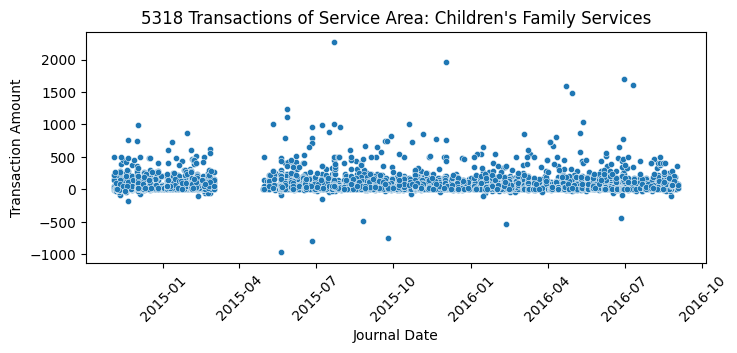

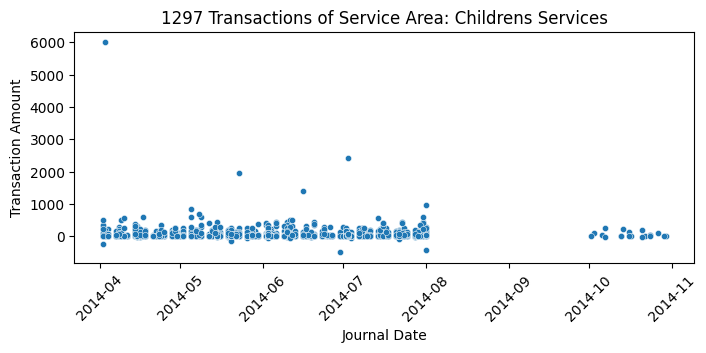

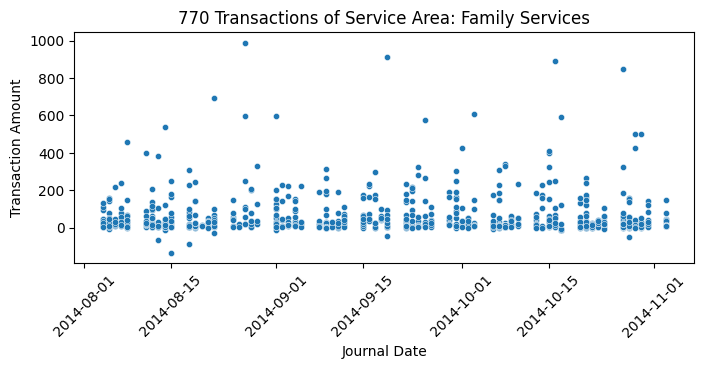

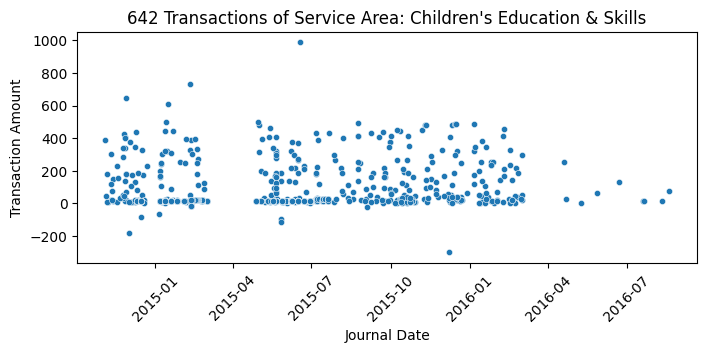

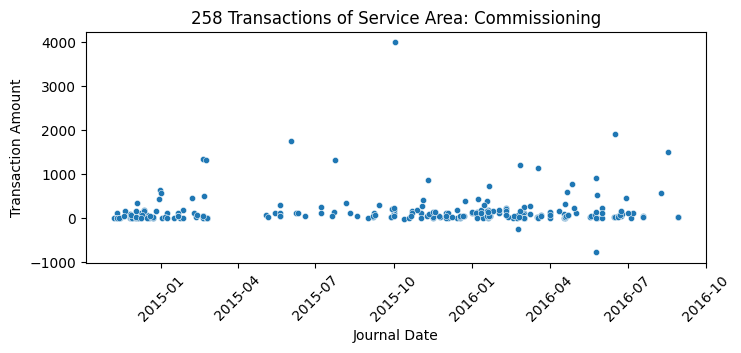

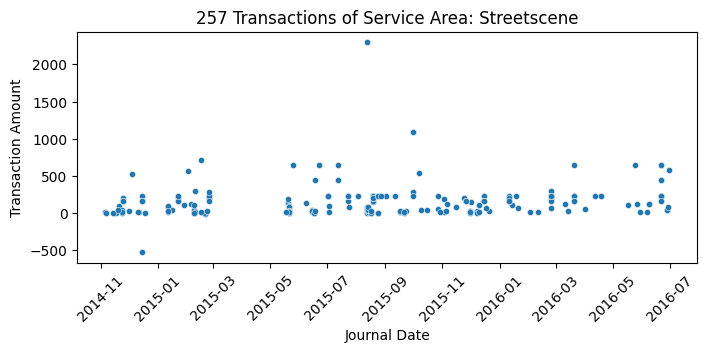

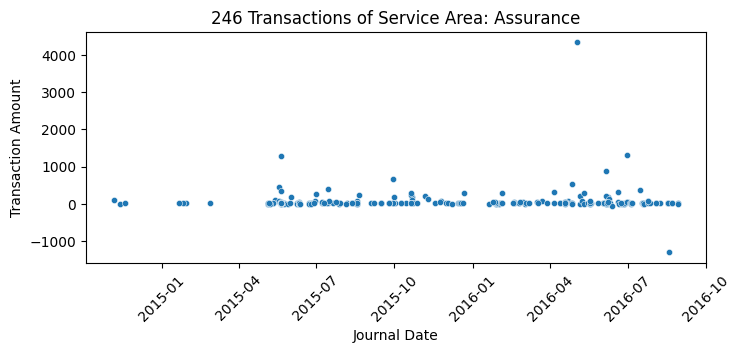

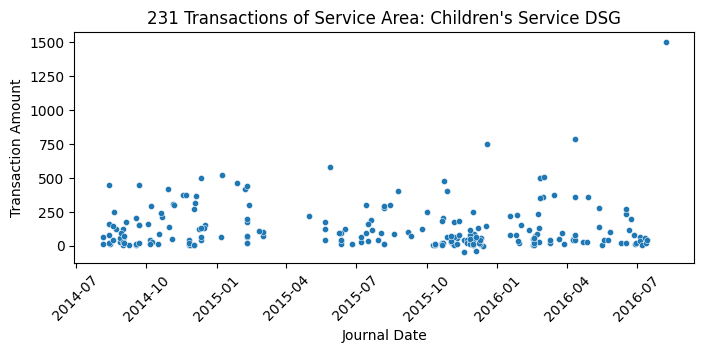

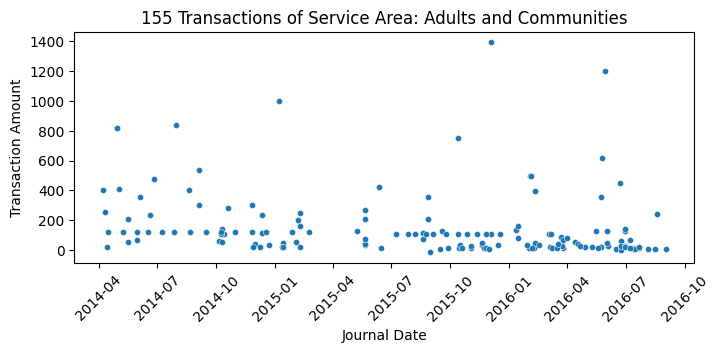

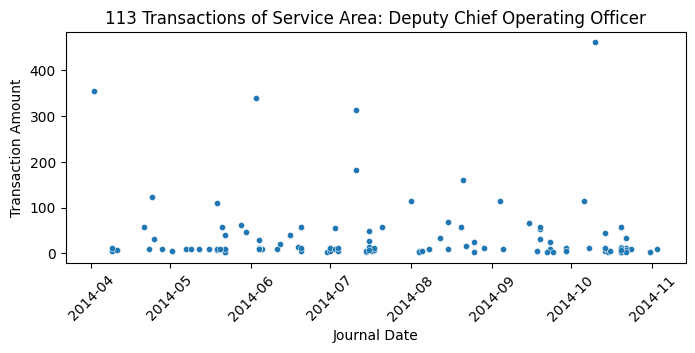

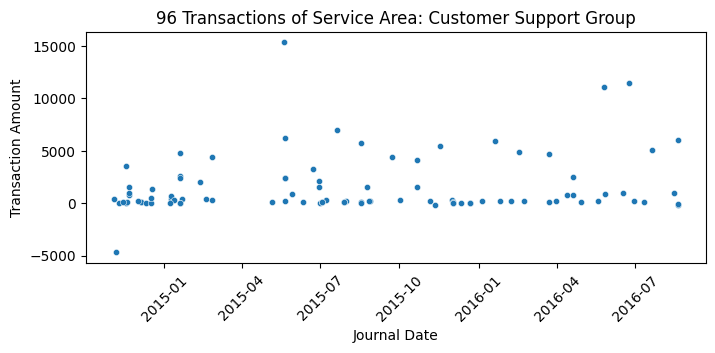

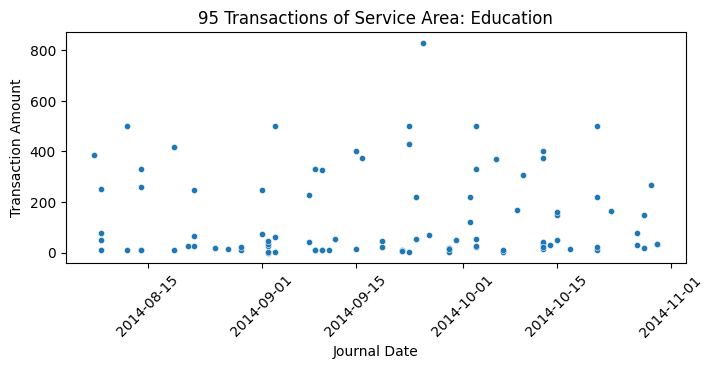

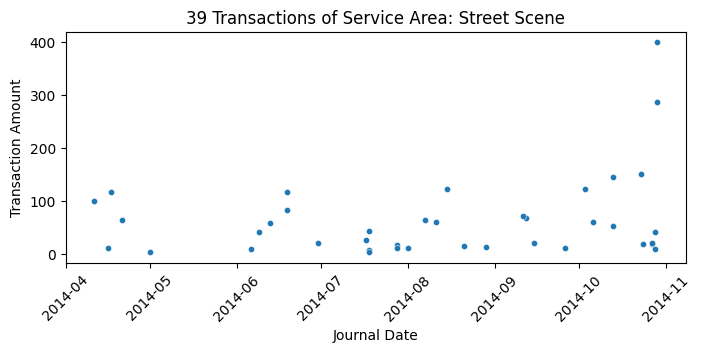

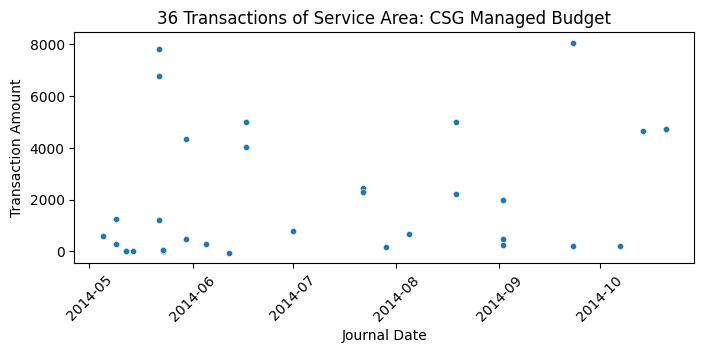

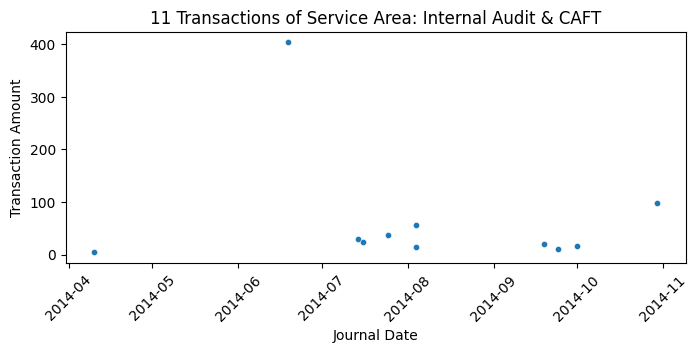

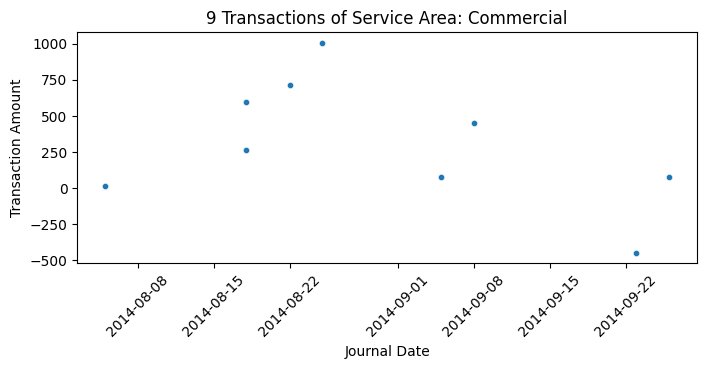

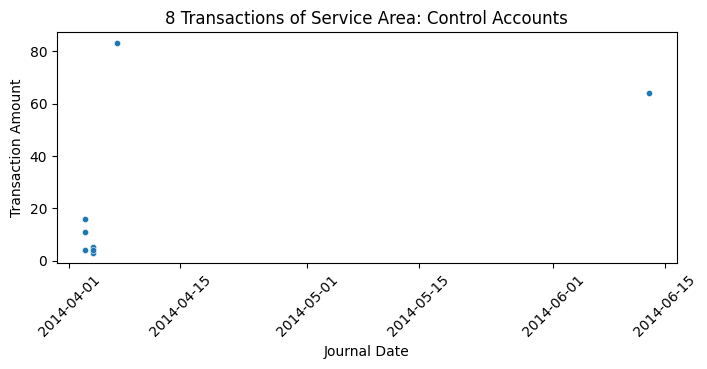

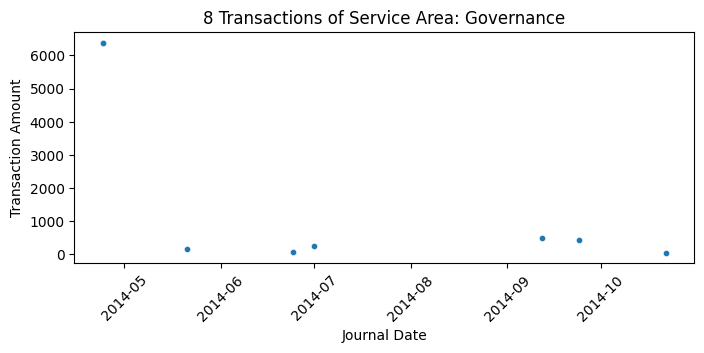

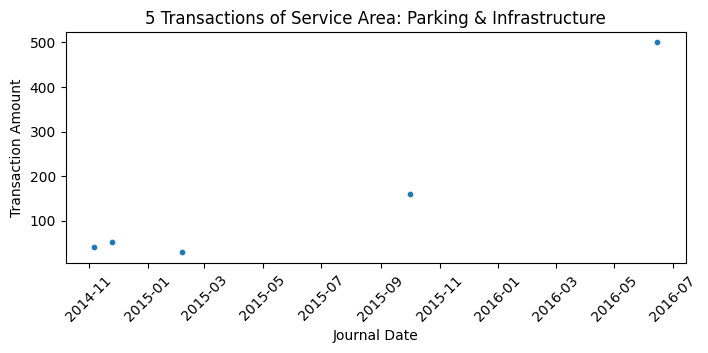

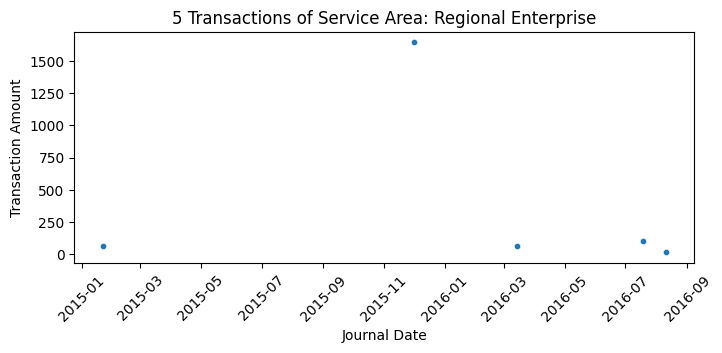

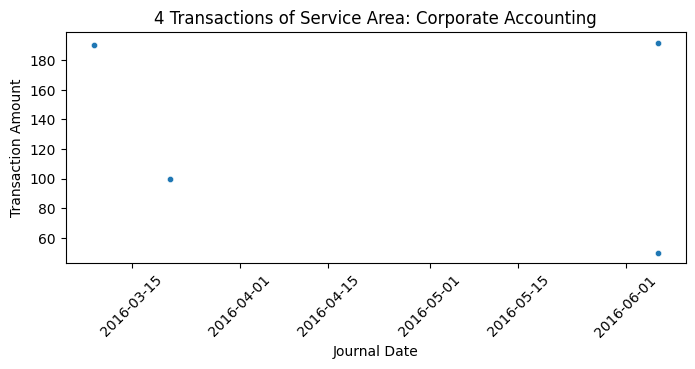

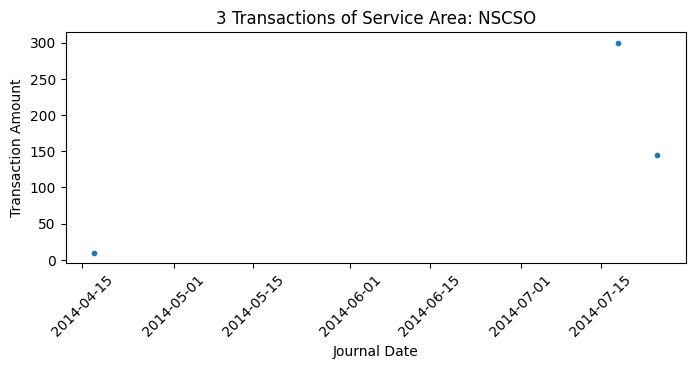

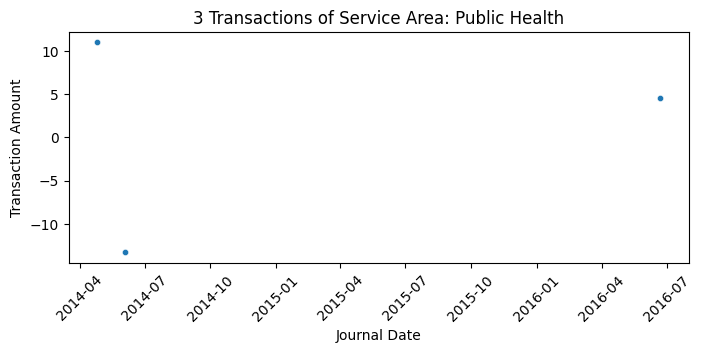

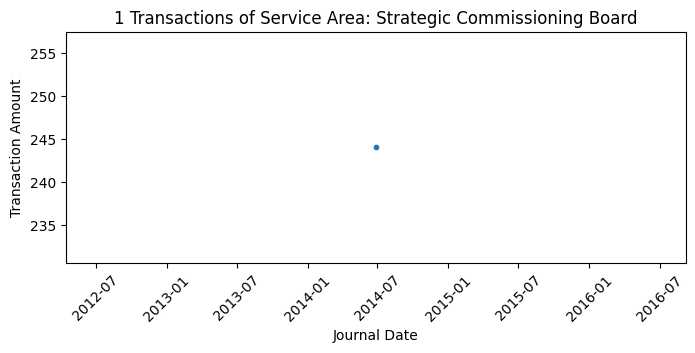

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# draw scatter plots by service areas and transaction amounts
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(8, 3))
    sns.scatterplot(data=df[df['Service Area']==service_area], x='Journal Date', y='Amount', s=20)
    plt.xlabel('Journal Date')
    plt.ylabel('Transaction Amount')
    plt.title(f'{len(df[df['Service Area']==service_area])} Transactions of Service Area: {service_area}')
    plt.xticks(rotation=45)
    plt.show()

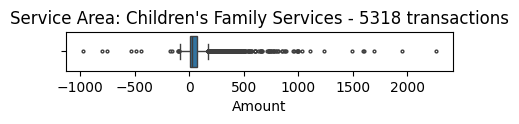

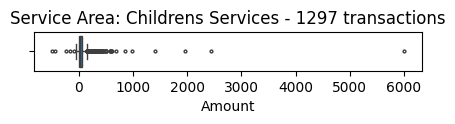

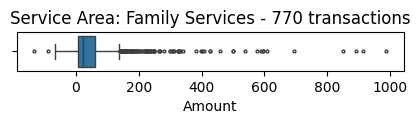

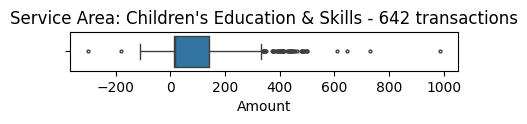

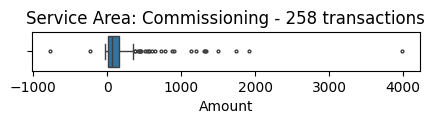

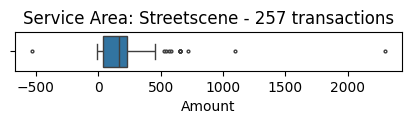

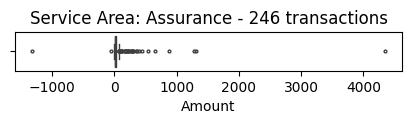

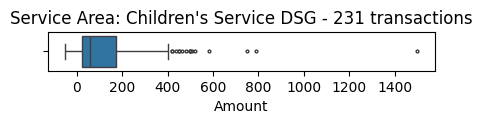

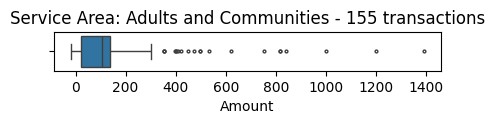

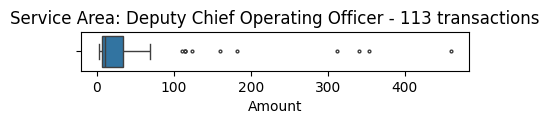

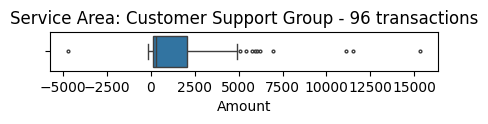

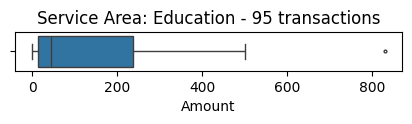

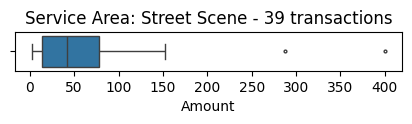

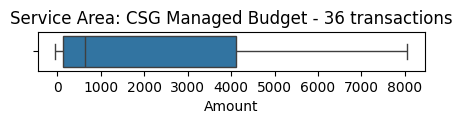

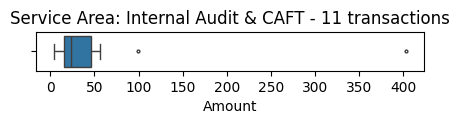

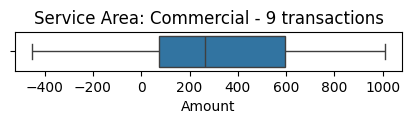

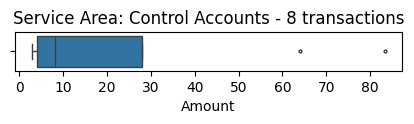

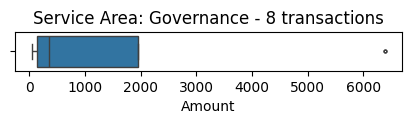

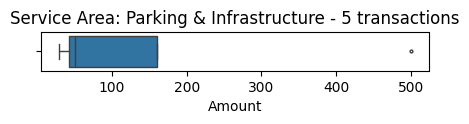

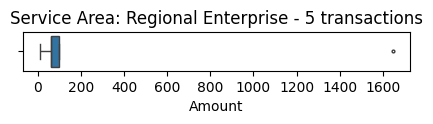

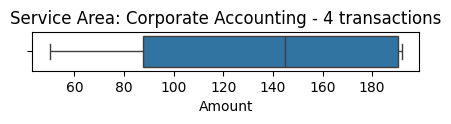

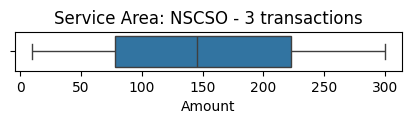

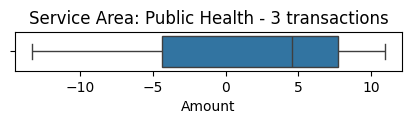

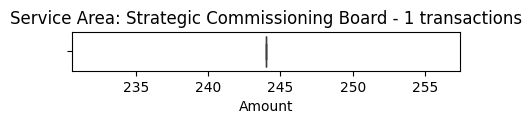

In [46]:
# draw boxplots by service areas and transactions amounts
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(5, 0.5))
    sns.boxplot(data=df[df['Service Area']==service_area]['Amount'], orient='h', fliersize=2)
    plt.title(f'Service Area: {service_area} - {len(df[df['Service Area']==service_area])} transactions')
    plt.show()

In [47]:
import warnings
warnings.filterwarnings("ignore")

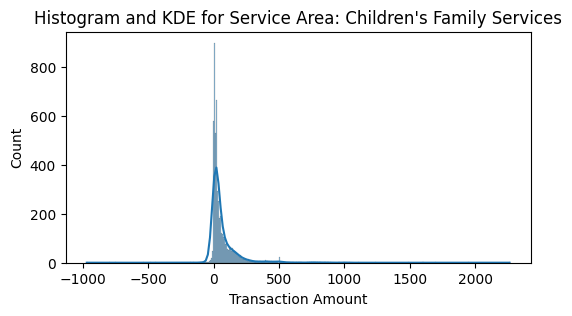

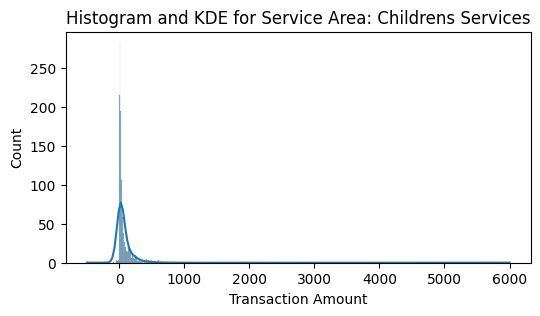

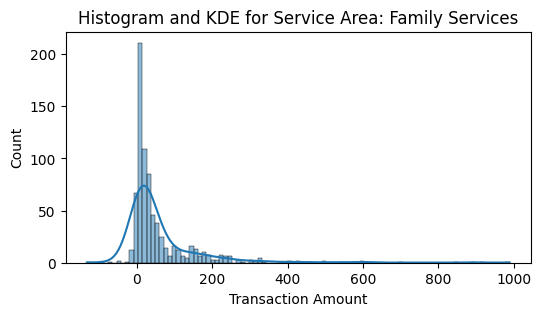

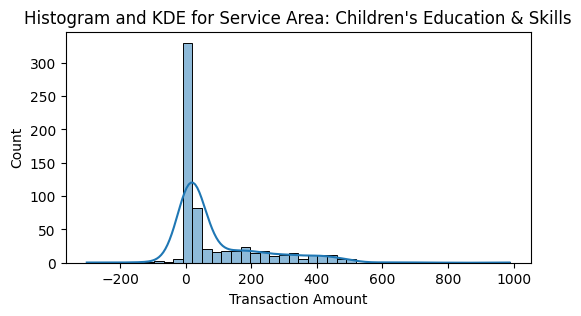

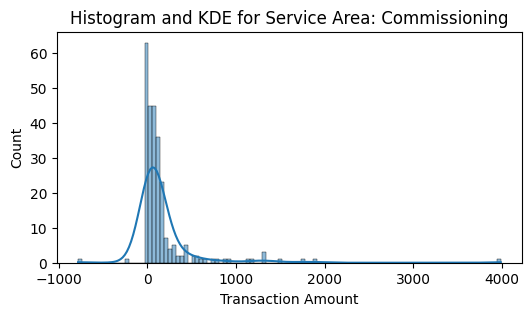

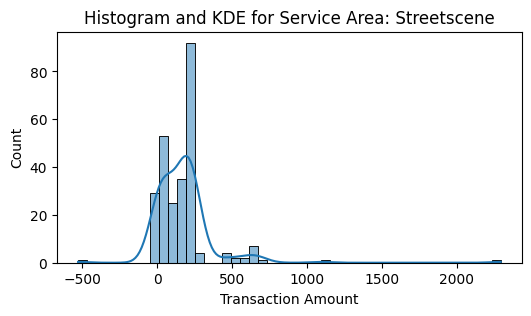

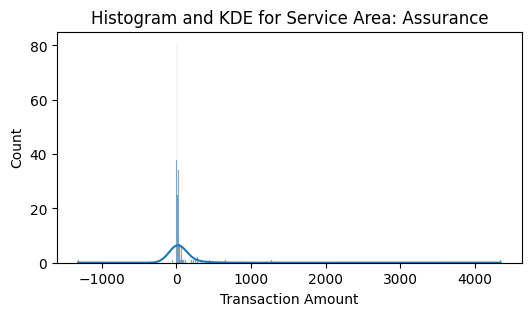

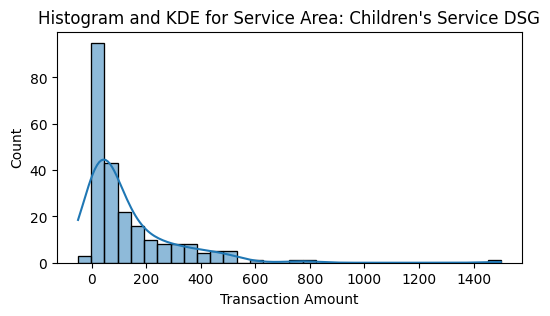

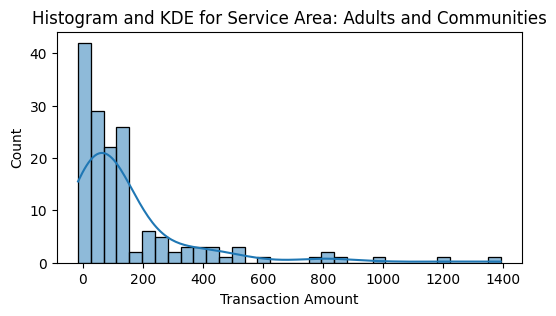

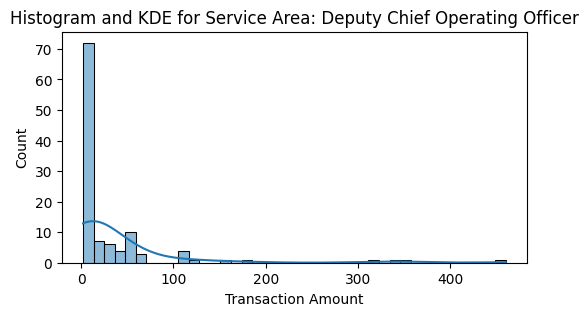

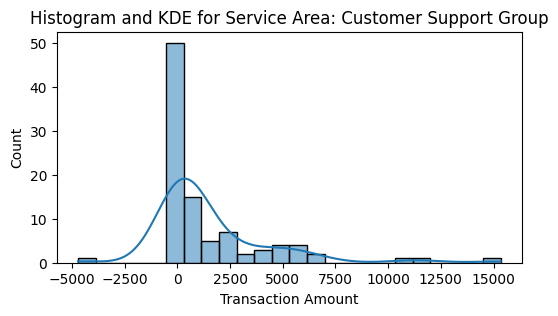

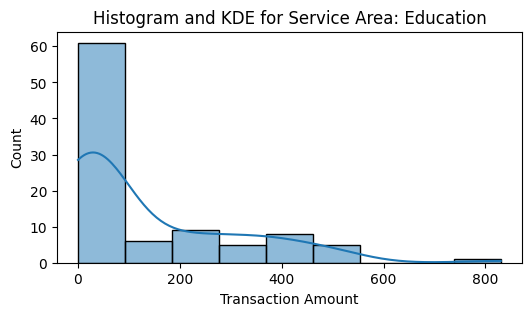

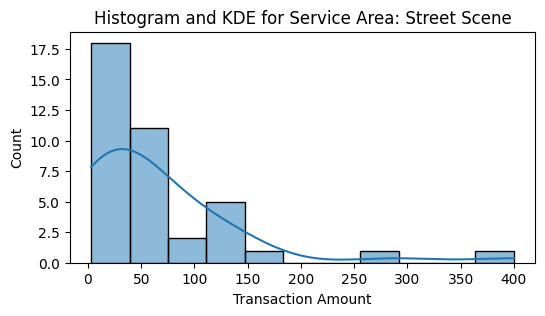

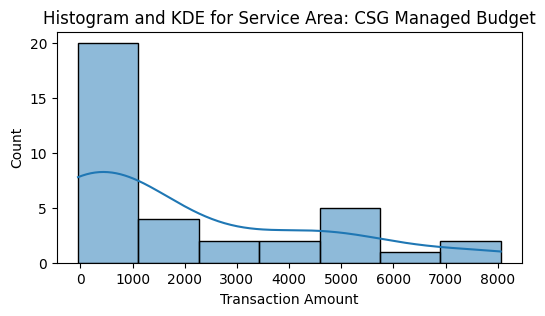

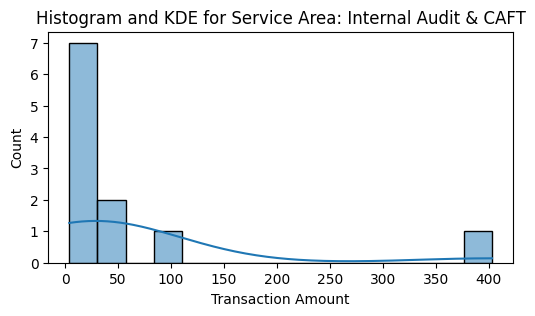

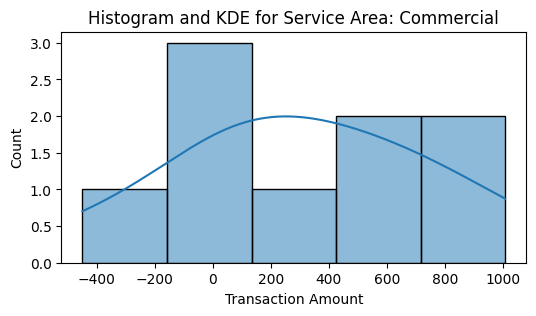

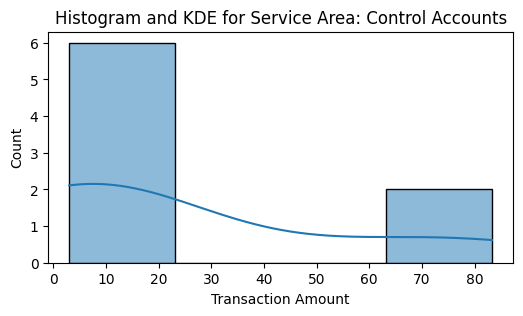

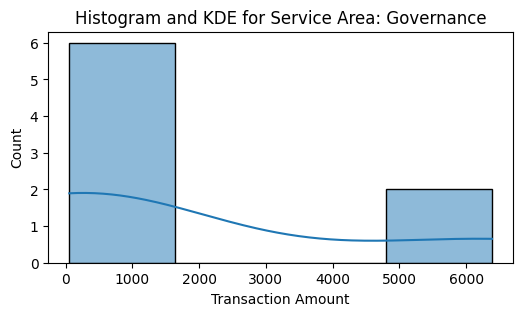

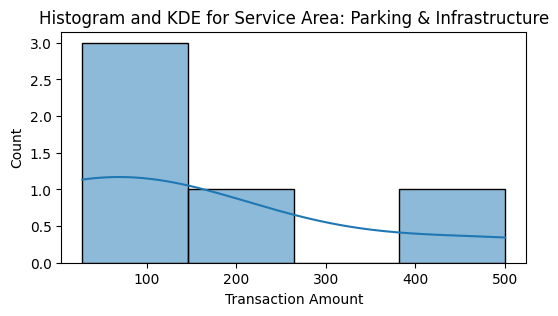

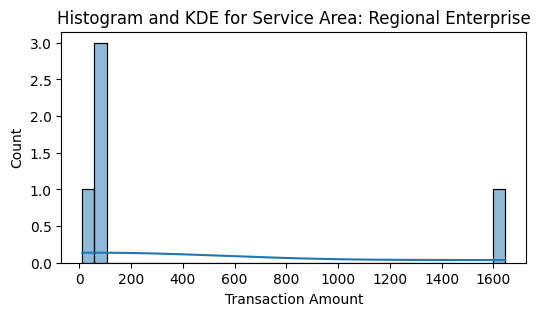

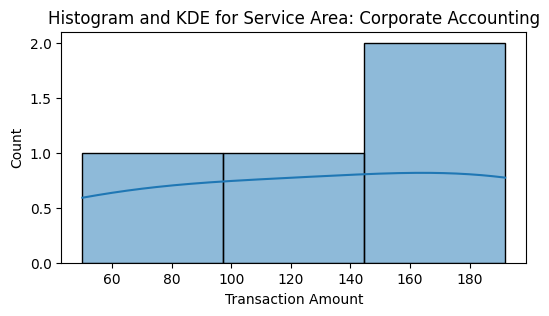

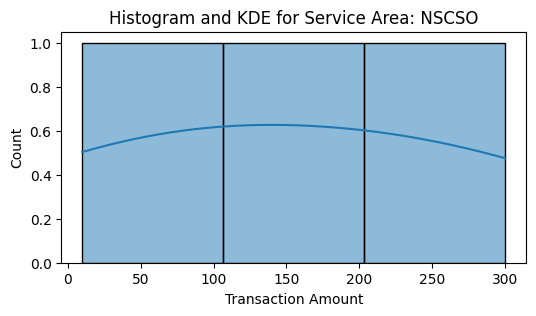

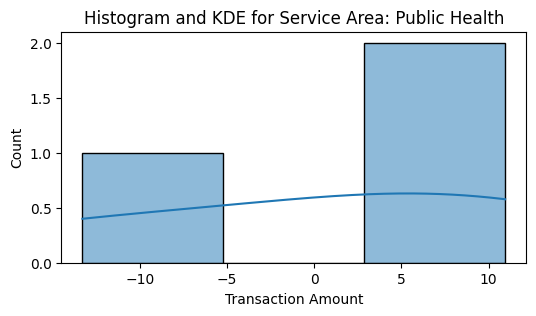

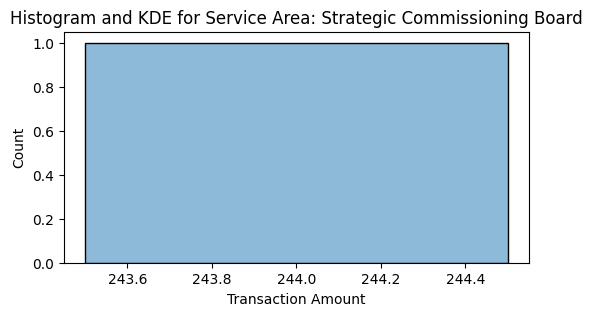

In [48]:
# explore data distributions
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df[df['Service Area']==service_area]['Amount'], kde=True, kde_kws={'bw_method': 'silverman'})
    plt.title(f'Histogram and KDE for Service Area: {service_area}')
    plt.xlabel('Transaction Amount')
    plt.show()

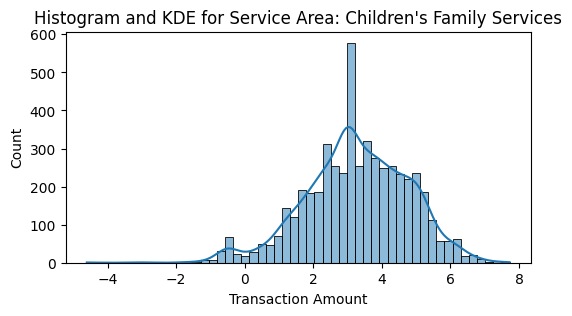

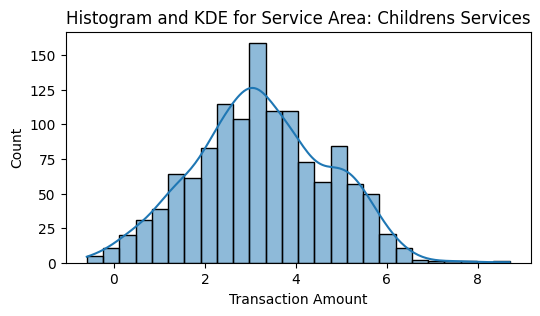

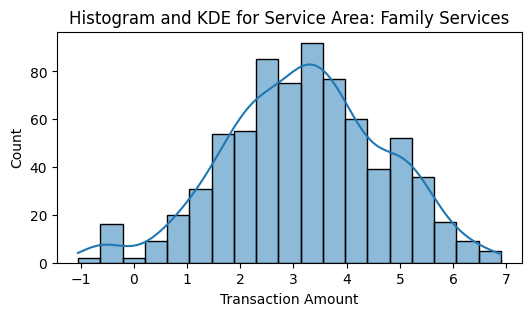

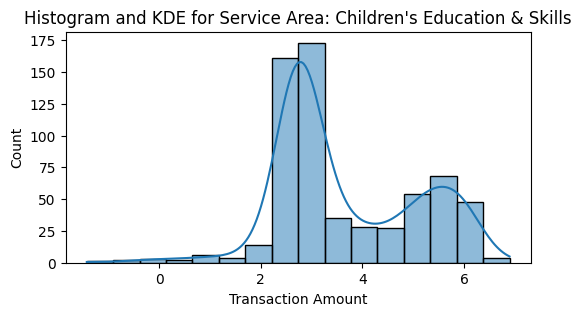

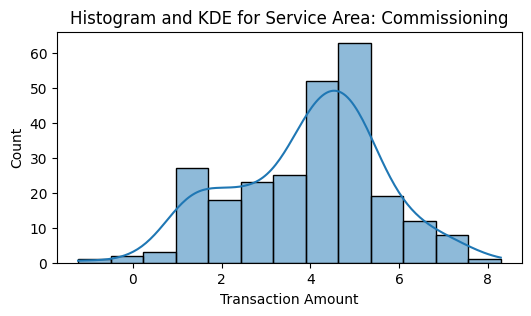

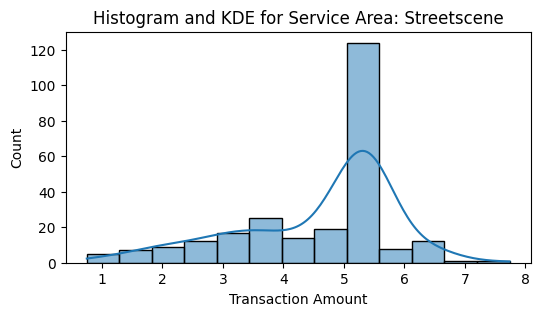

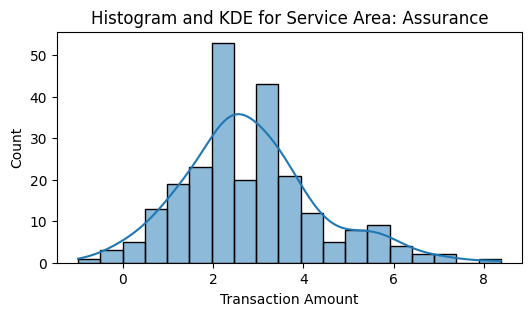

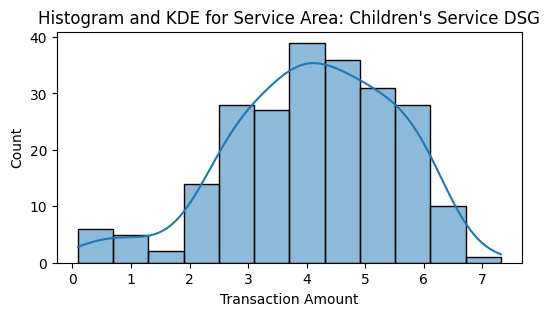

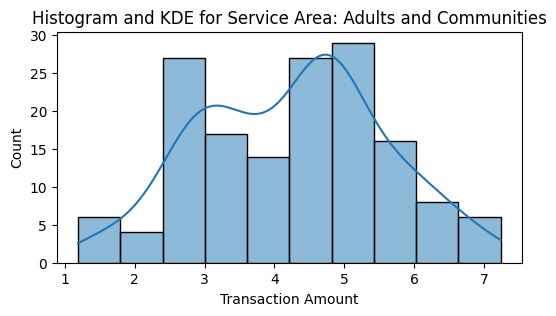

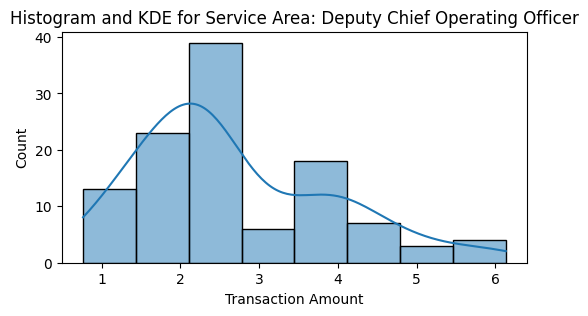

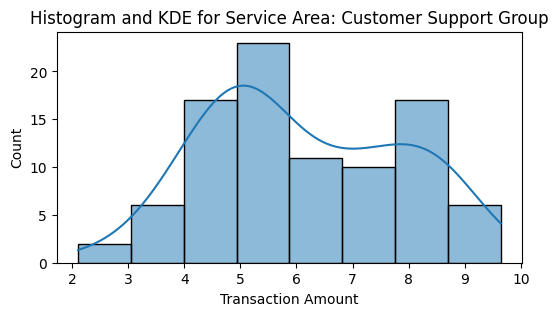

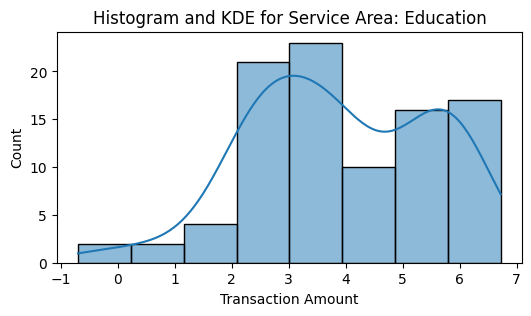

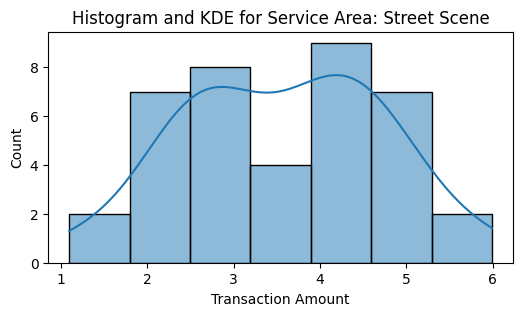

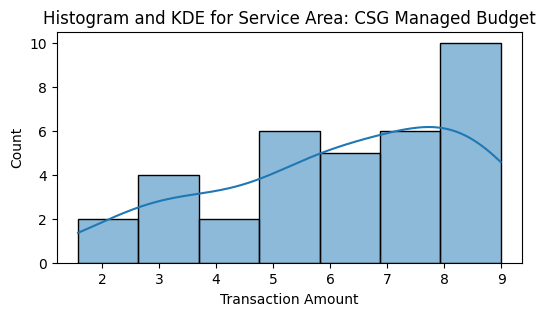

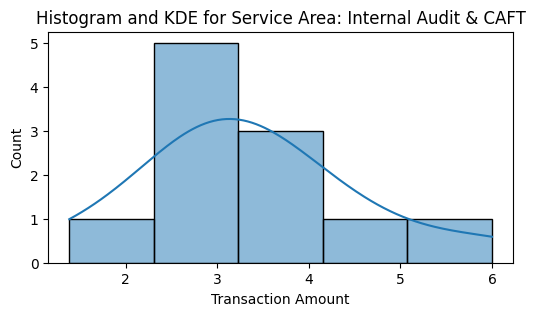

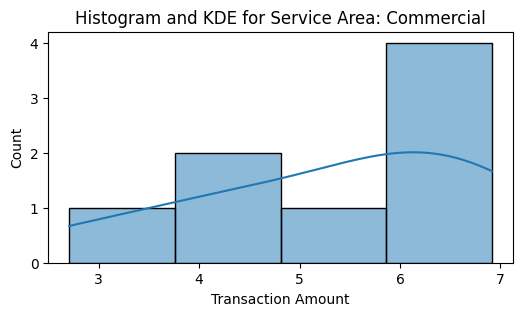

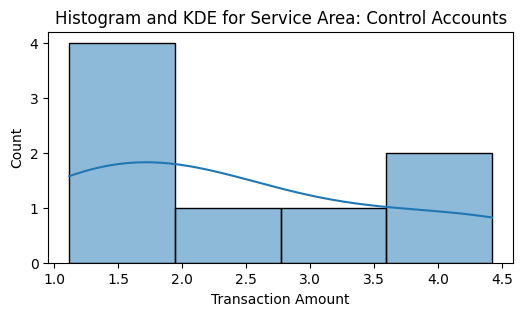

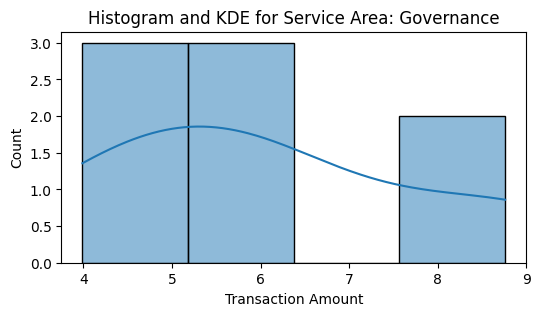

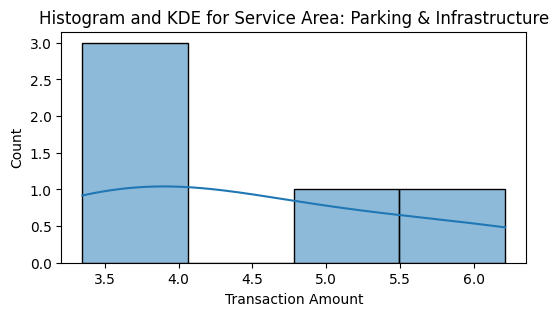

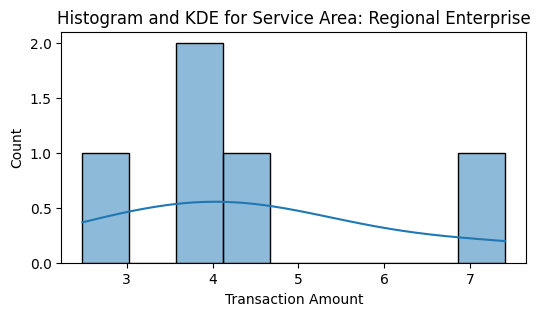

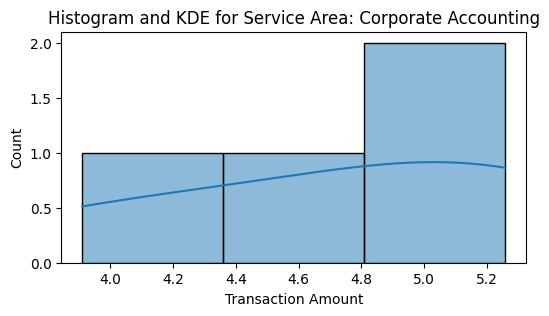

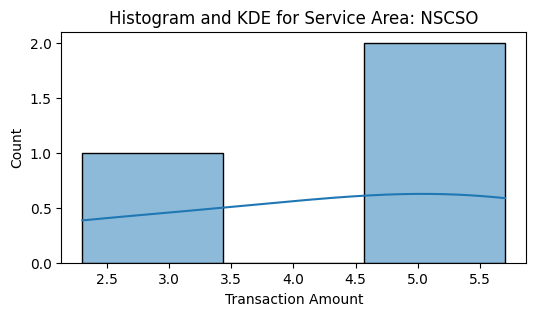

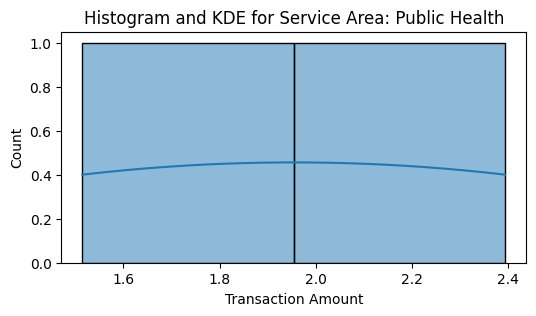

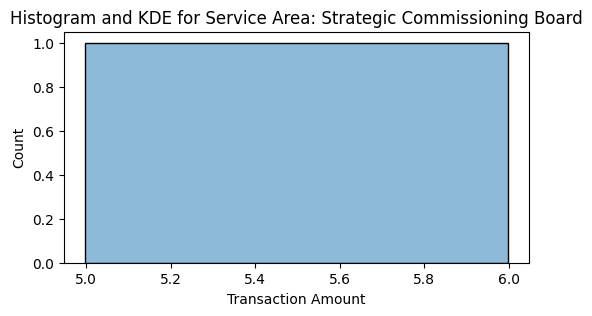

In [49]:
# explore data distributions (log-normal)
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(6, 3))
    sns.histplot(data=np.log(df[df['Service Area']==service_area]['Amount']), kde=True, kde_kws={'bw_method': 'silverman'})
    plt.title(f'Histogram and KDE for Service Area: {service_area}')
    plt.xlabel('Transaction Amount')
    plt.show()

### Visualize Q-by-Q Summary

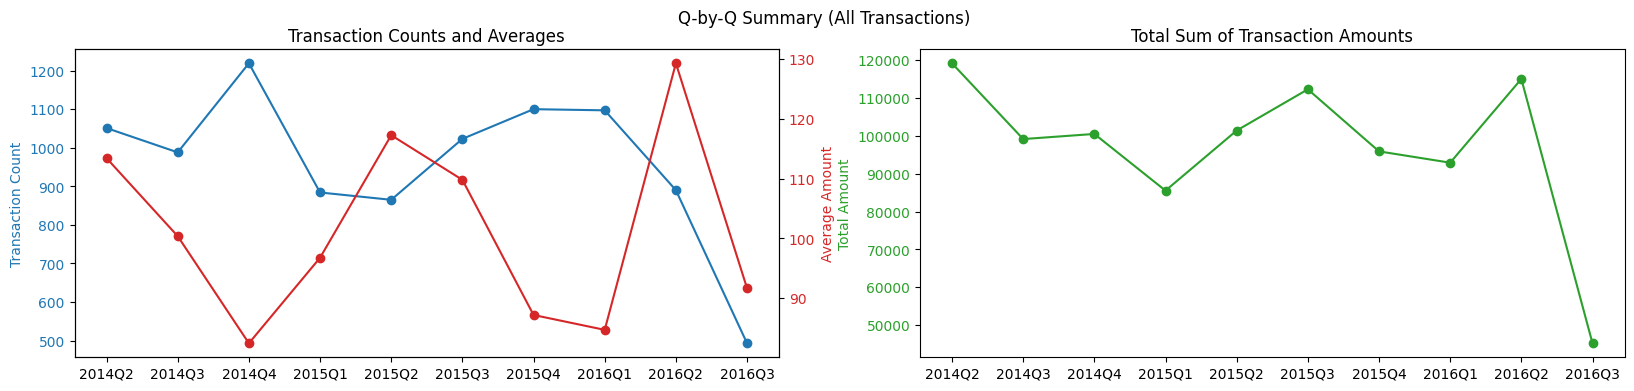

In [50]:
summary0 = df.groupby(['Quarter']).agg(
    transaction_count=('Amount', 'count'),
    total_amount=('Amount', 'sum'),
    average_amount=('Amount', 'mean')
).reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    
# left plot: Transaction counts and averages
ax1.set_ylabel('Transaction Count', color='tab:blue')
ax1.plot(summary0['Quarter'].astype(str), summary0['transaction_count'], marker='o', color='tab:blue', label='Transaction Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')
    
ax3 = ax1.twinx()
ax3.set_ylabel('Average Amount', color='tab:red')
ax3.plot(summary0['Quarter'].astype(str), summary0['average_amount'], marker='o', color='tab:red', label='Average Amount')
ax3.tick_params(axis='y', labelcolor='tab:red')
    
# right plot: Total transaction amounts
ax2.set_ylabel('Total Amount', color='tab:green')
ax2.plot(summary0['Quarter'].astype(str), summary0['total_amount'], marker='o', color='tab:green', label='Total Amount')
ax2.tick_params(axis='y', labelcolor='tab:green')
    
# setting titles and legends
ax1.set_title('Transaction Counts and Averages')
ax2.set_title('Total Sum of Transaction Amounts')
fig.suptitle('Q-by-Q Summary (All Transactions)', fontsize=12)

plt.show()

In [51]:
df[df['Quarter']=='2016Q3']['Journal Date'].dt.month.value_counts()

Journal Date
8    260
7    219
9     14
Name: count, dtype: int64

#### Needs to inquire why transaction counts are so low in Q3 2016 and why September 2016 had too few transactions.

In [52]:
df[df['Quarter']=='2016Q2']['Journal Date'].dt.month.value_counts()

Journal Date
6    368
4    265
5    257
Name: count, dtype: int64

In [53]:
df[df['Quarter']=='2014Q2']['Journal Date'].dt.month.value_counts()

Journal Date
5    432
4    326
6    293
Name: count, dtype: int64

### Visualize Q-Q Summary by Each Service Area

In [54]:
# summary View of Transactions
summary = df.groupby(['Service Area', 'Quarter']).agg(
    transaction_count=('Amount', 'count'),
    total_amount=('Amount', 'sum'),
    average_amount=('Amount', 'mean')
).reset_index()

In [55]:
#summary.to_excel('summary.xlsx')

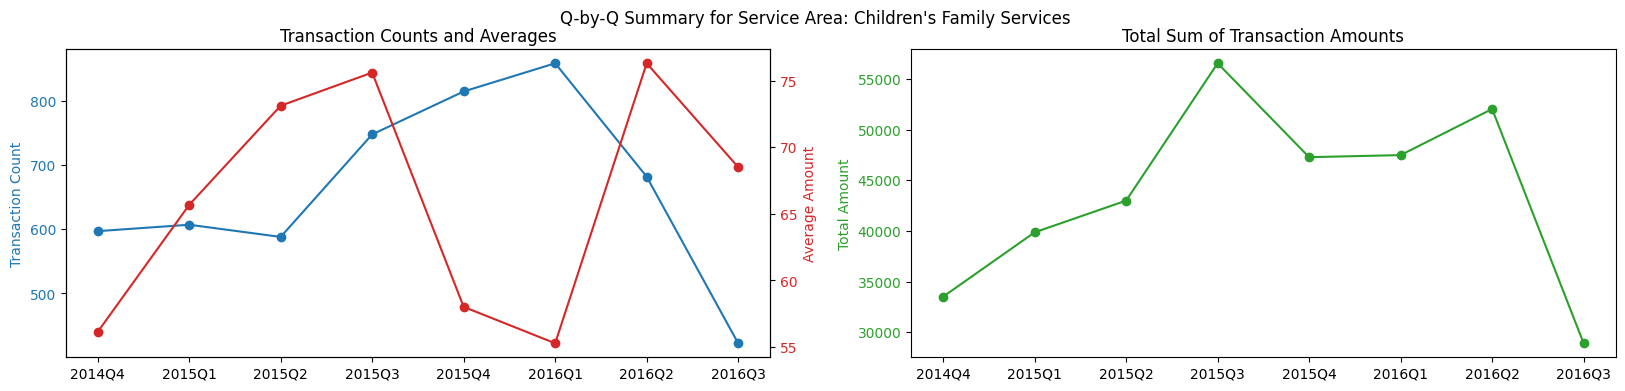

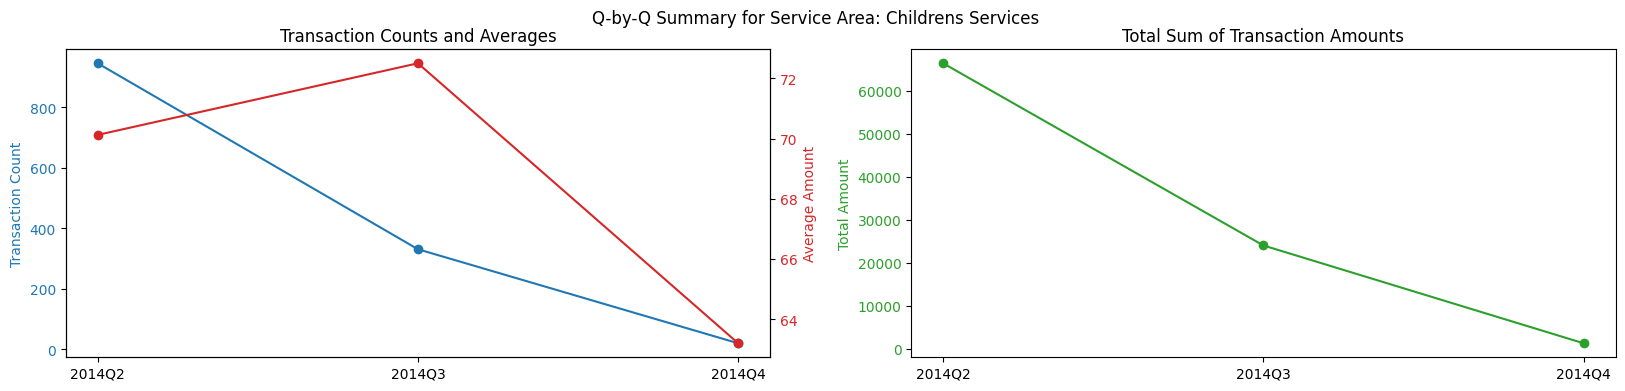

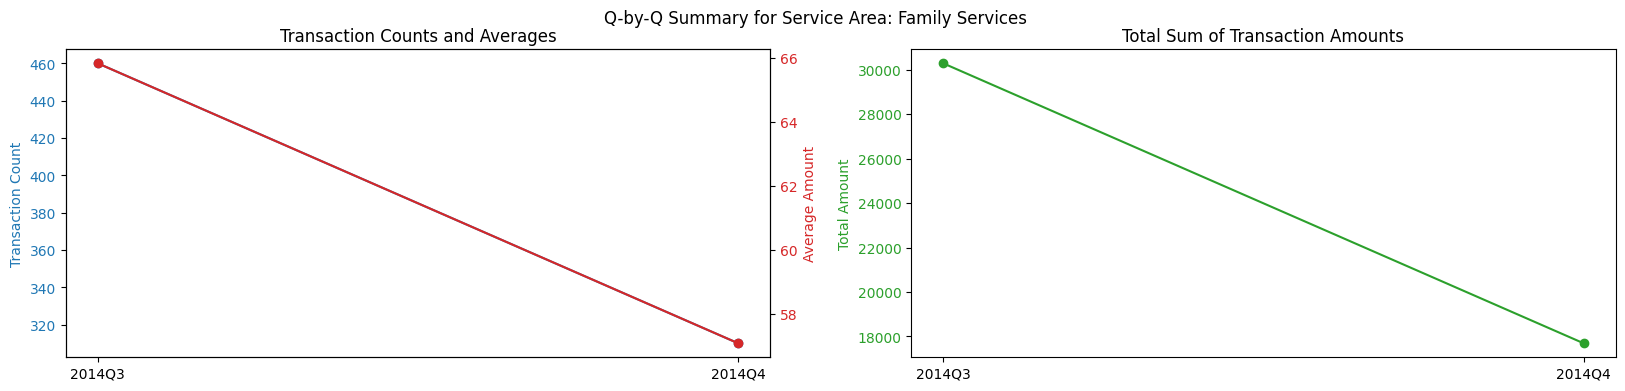

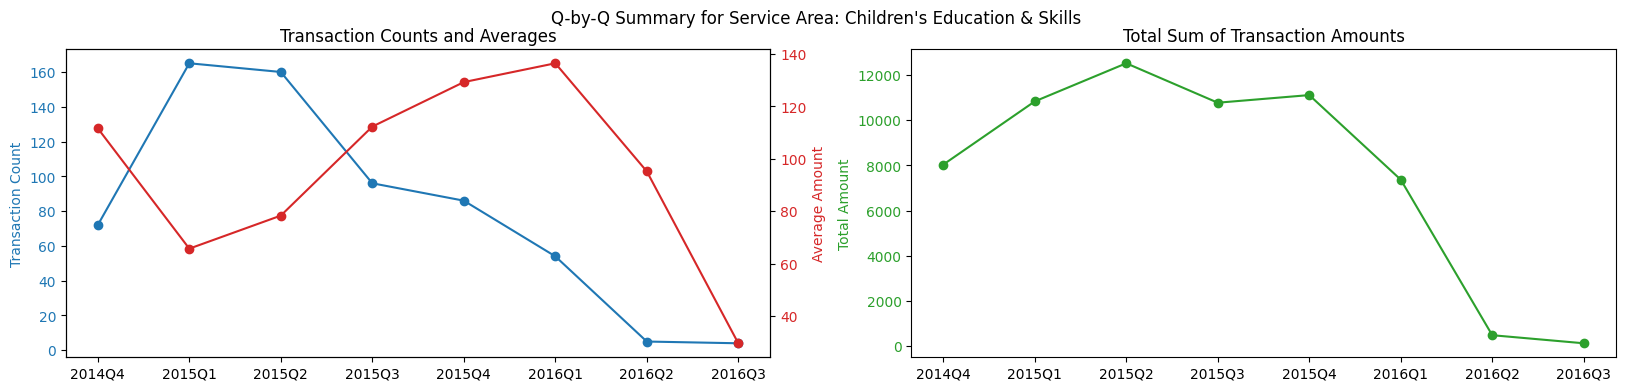

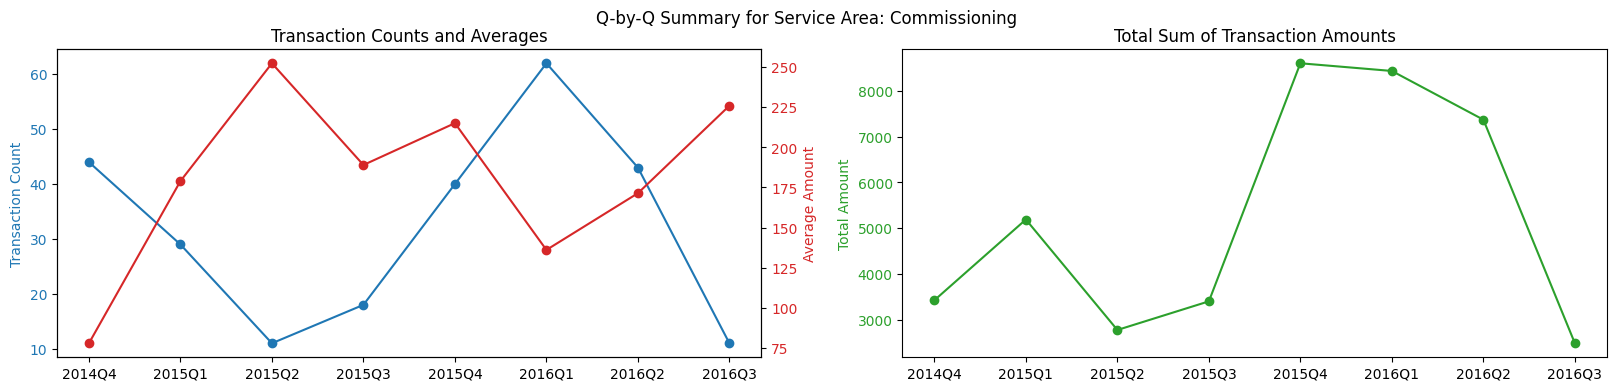

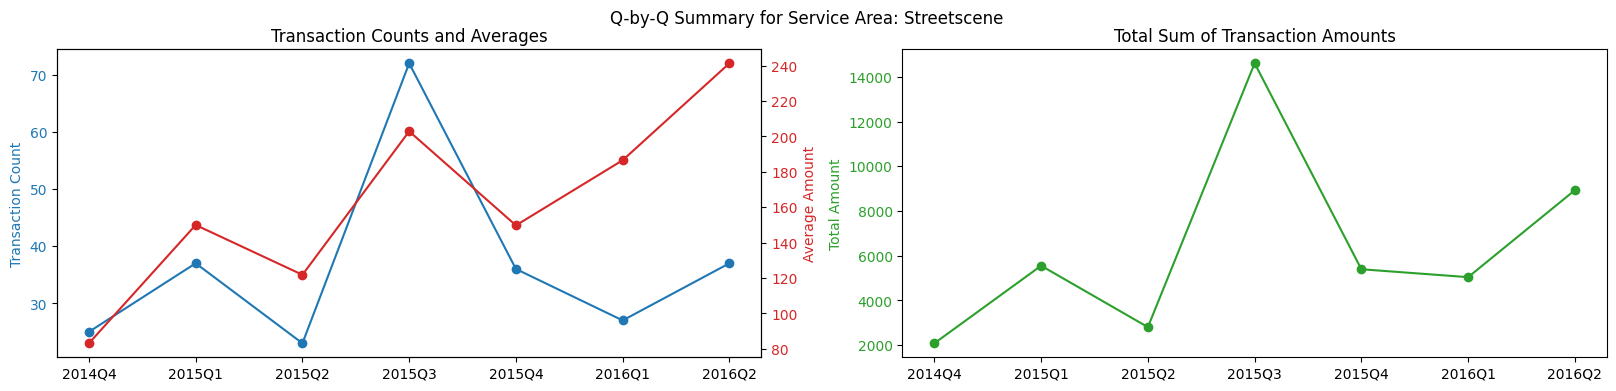

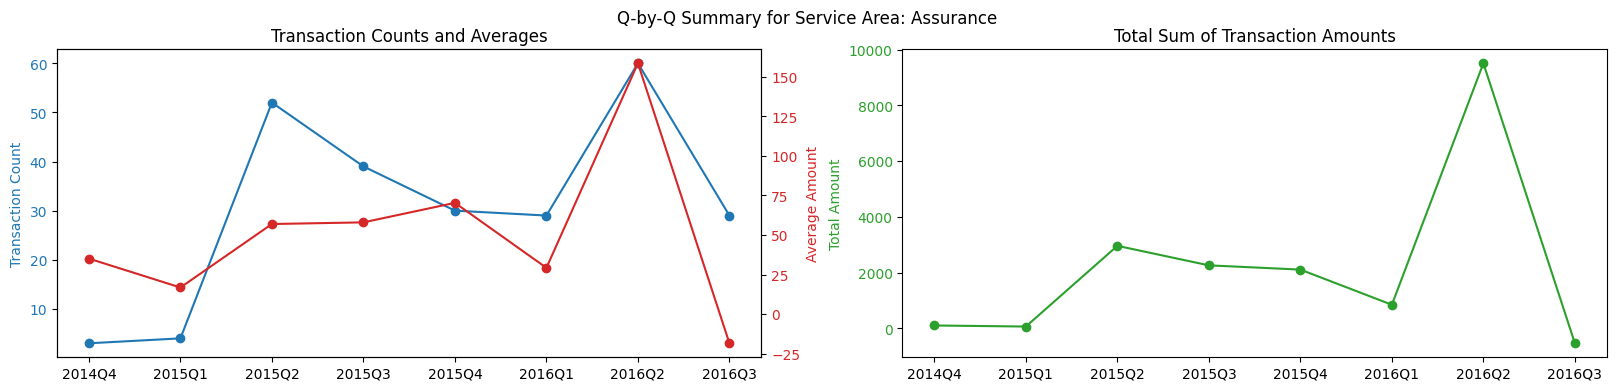

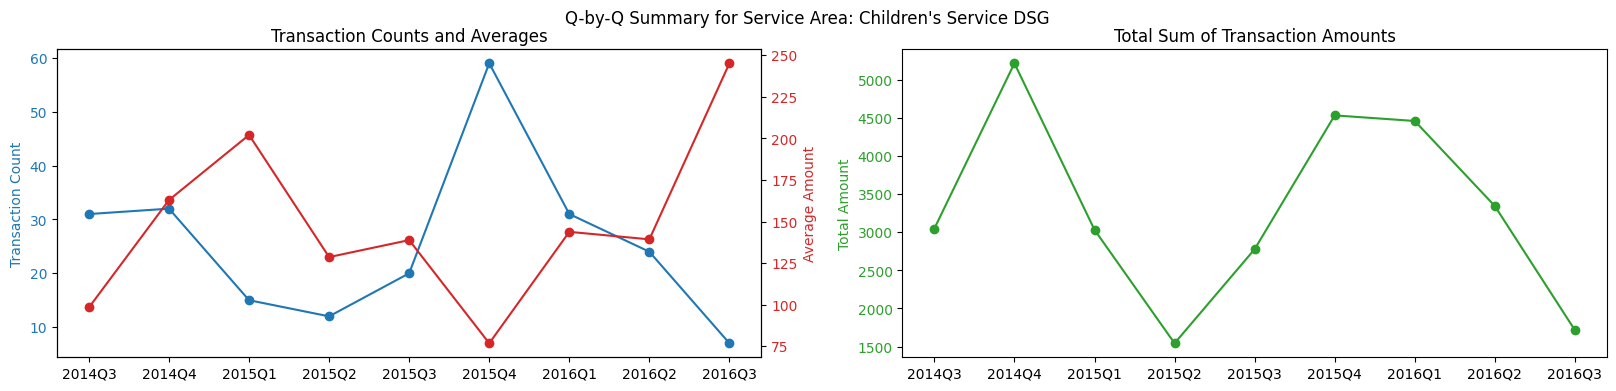

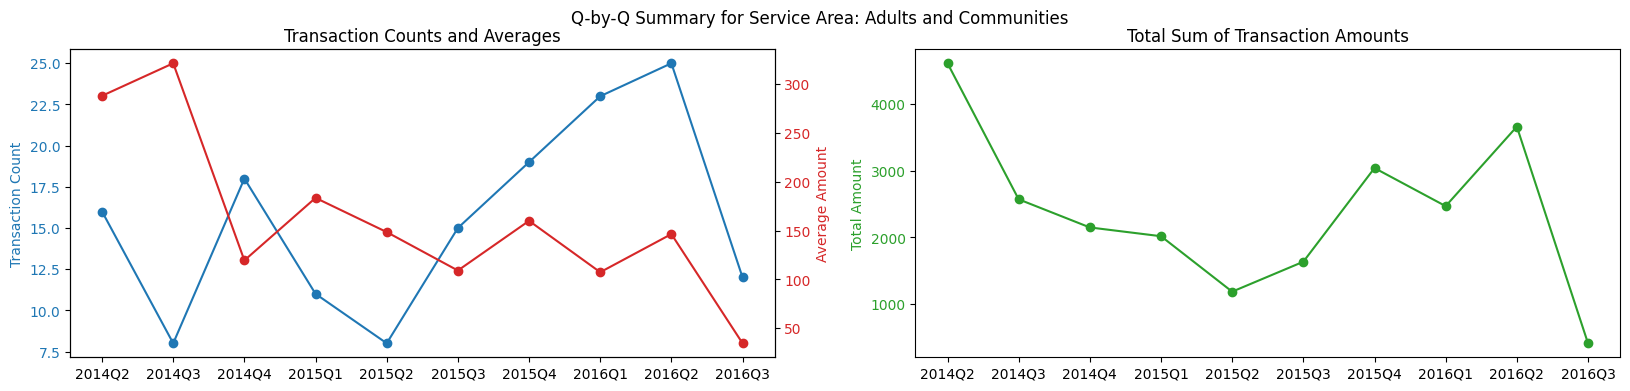

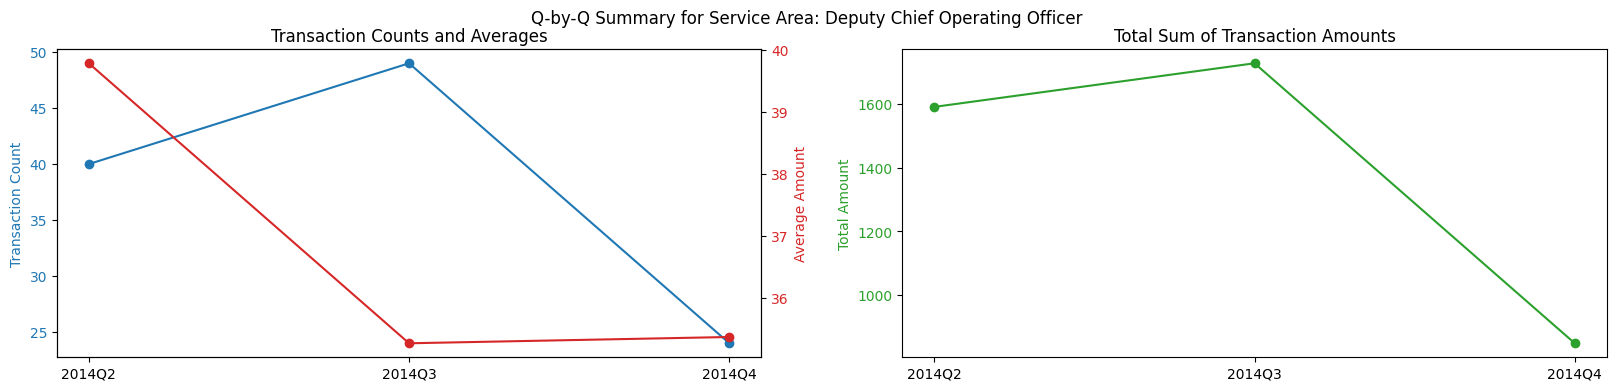

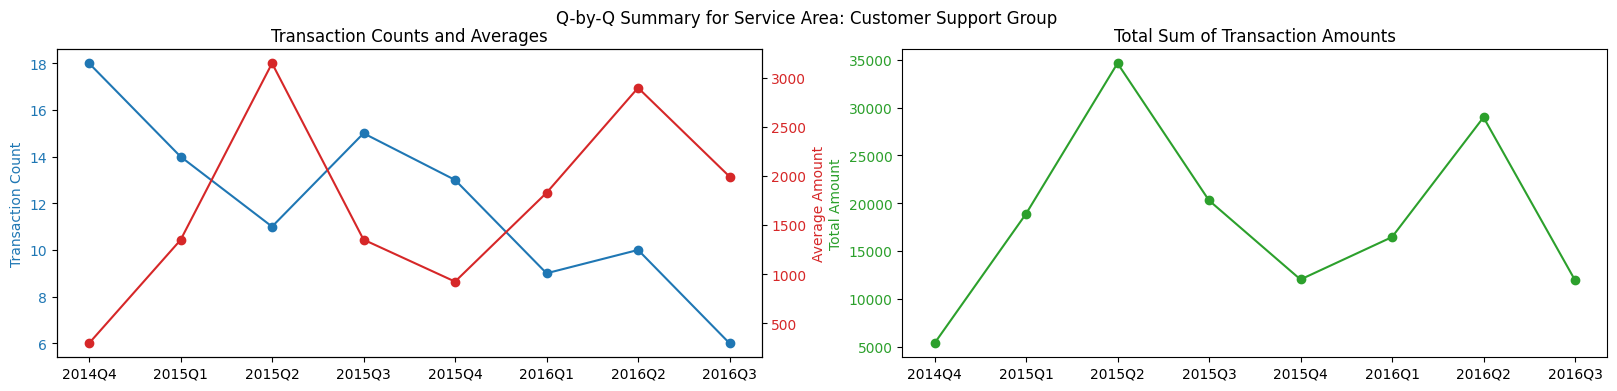

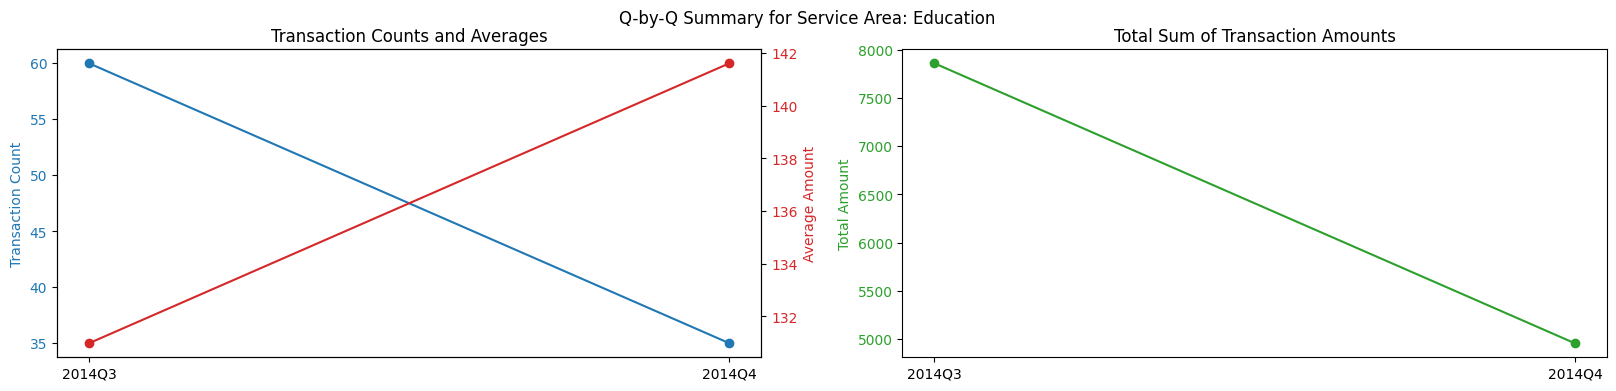

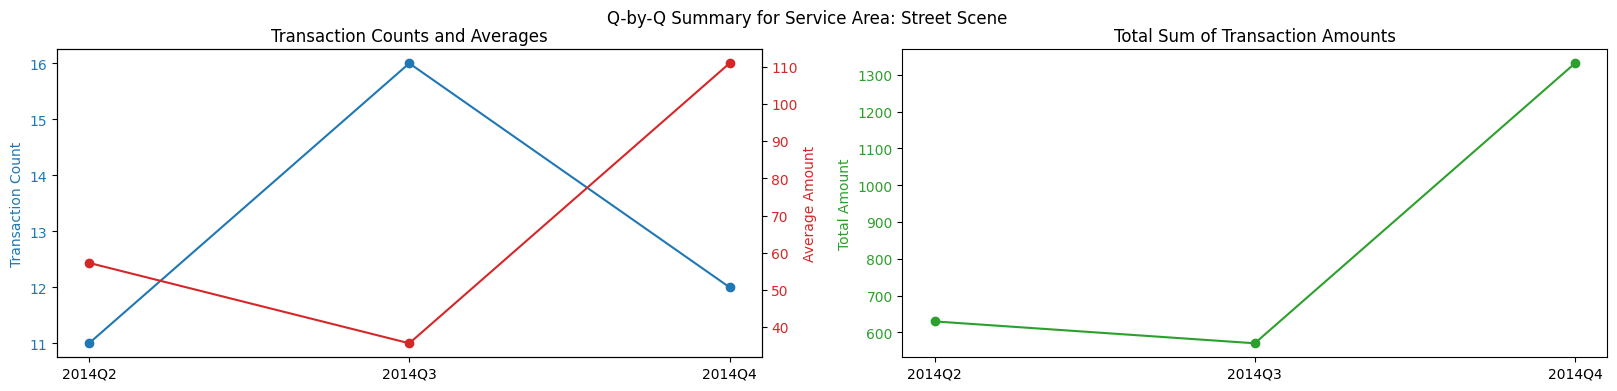

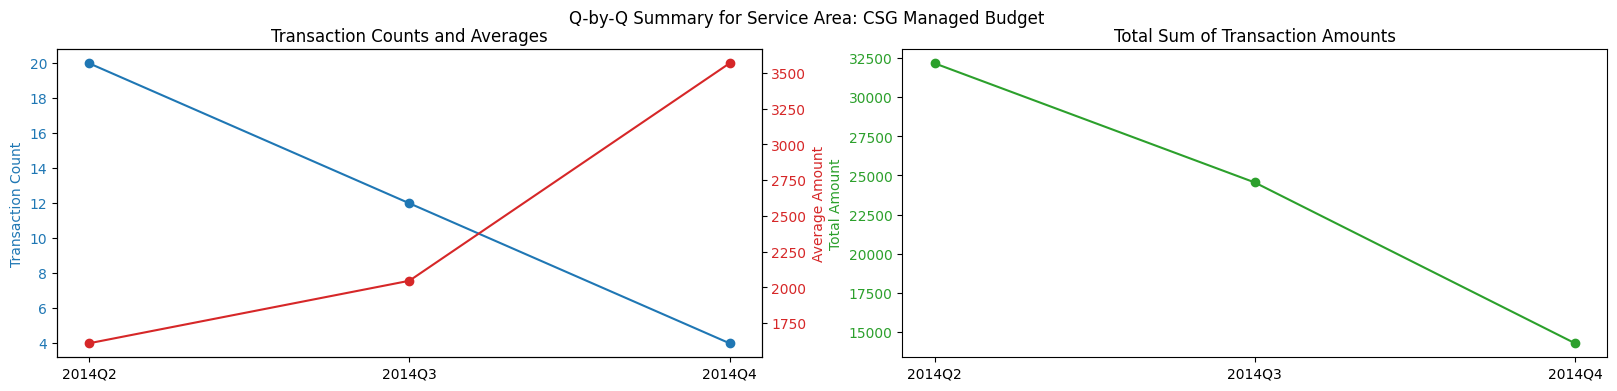

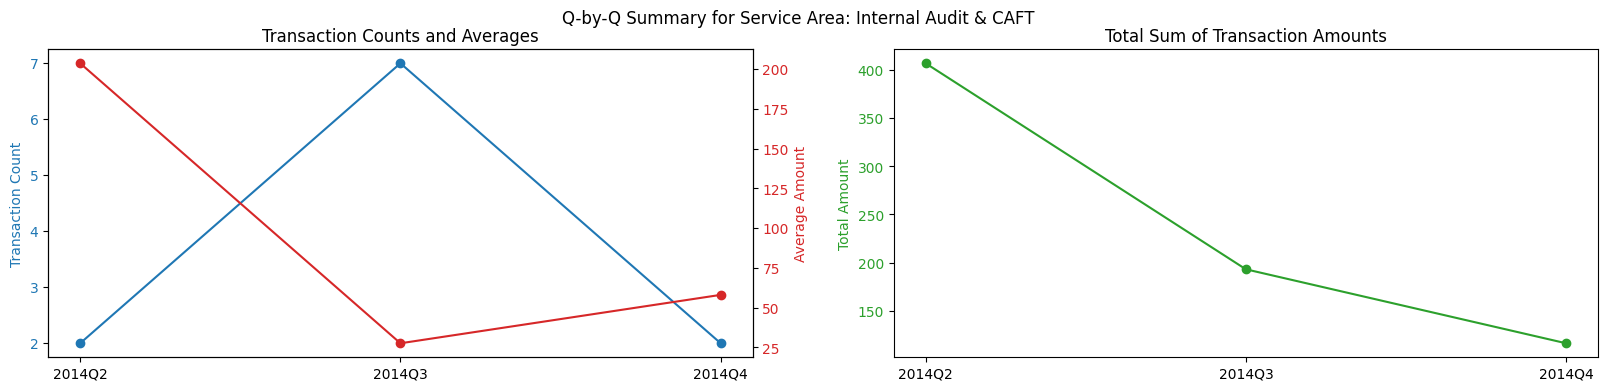

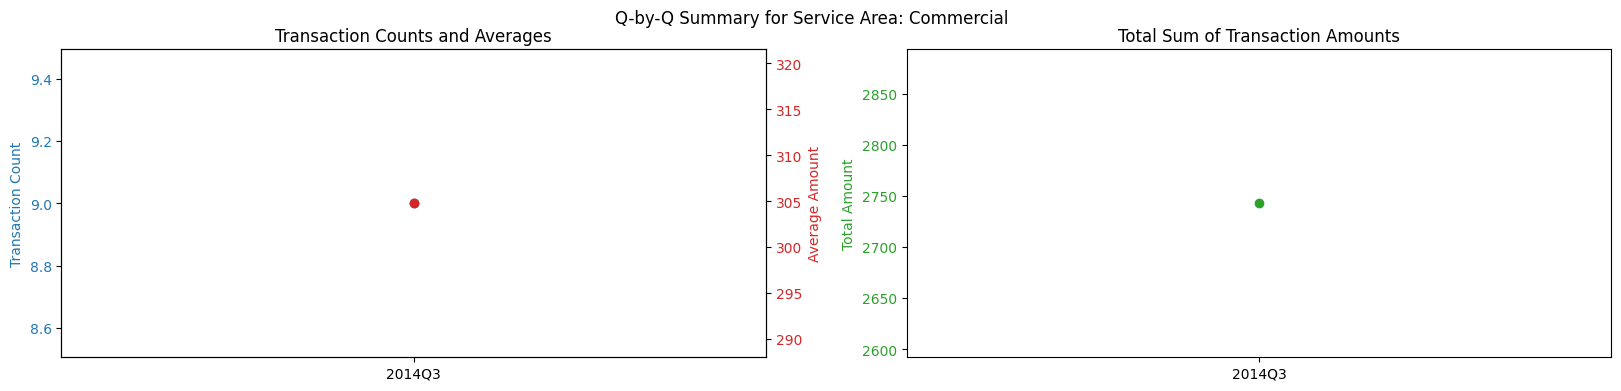

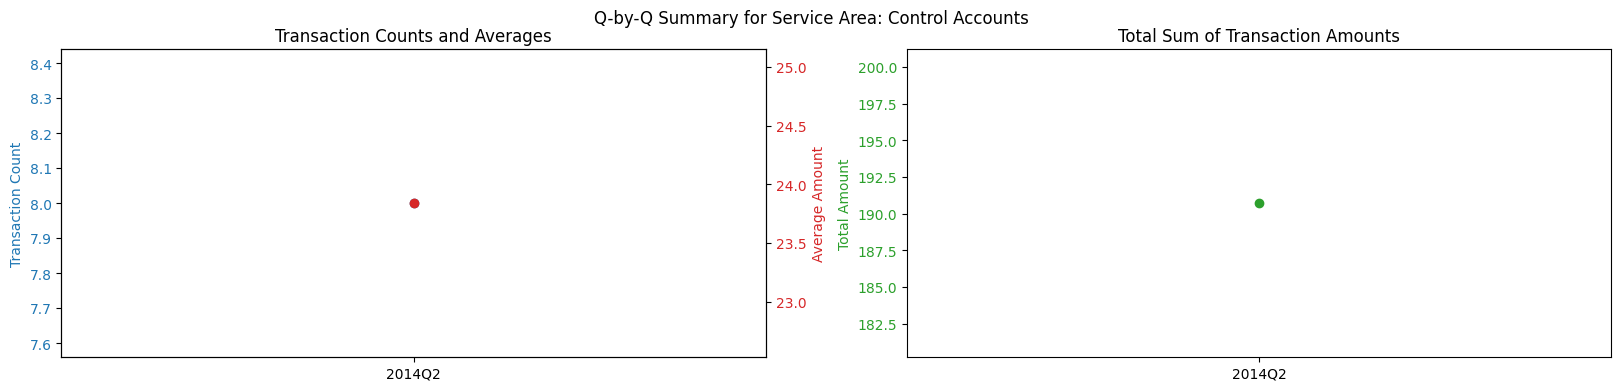

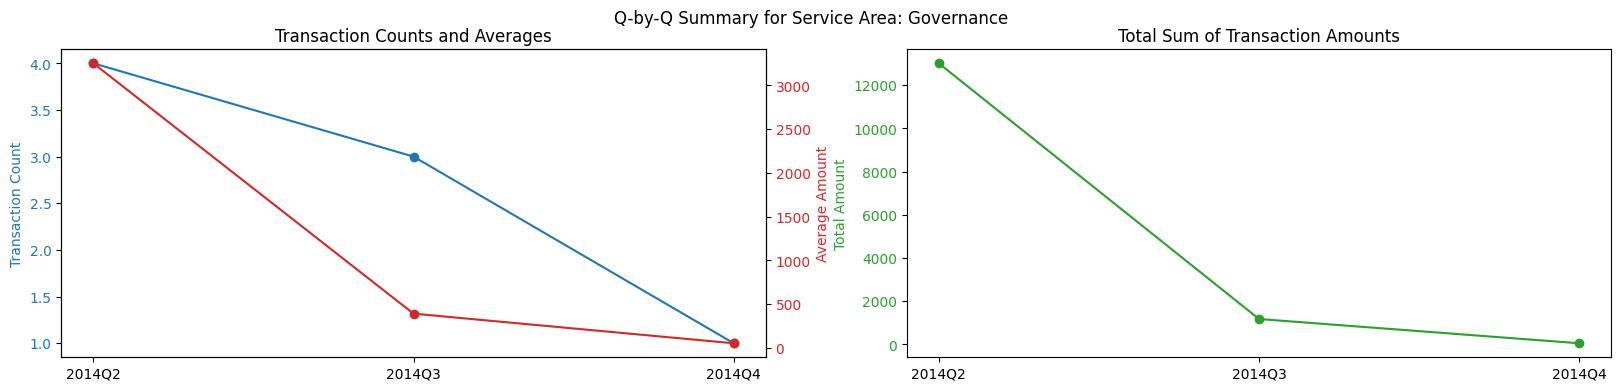

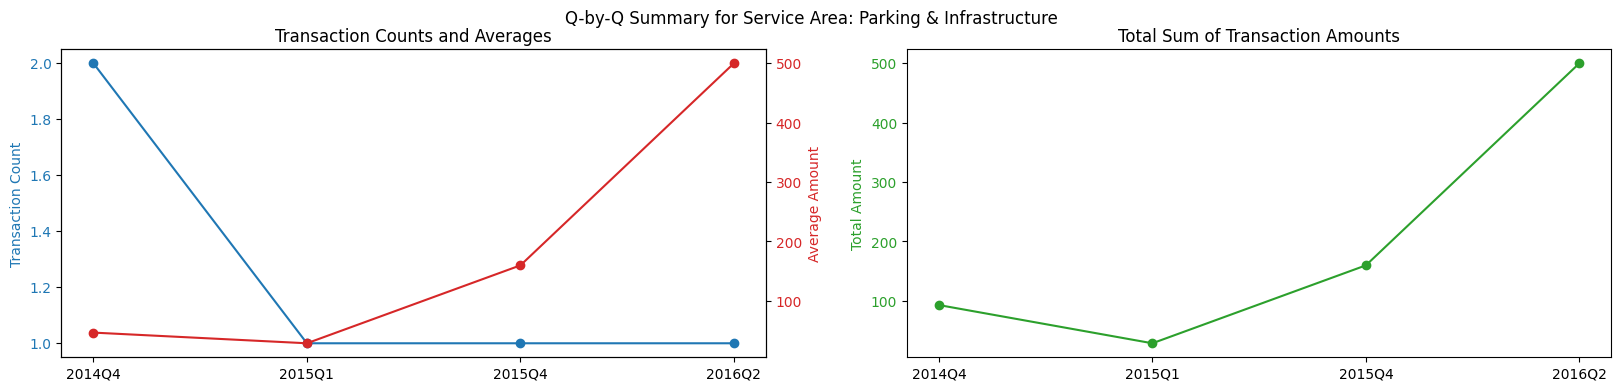

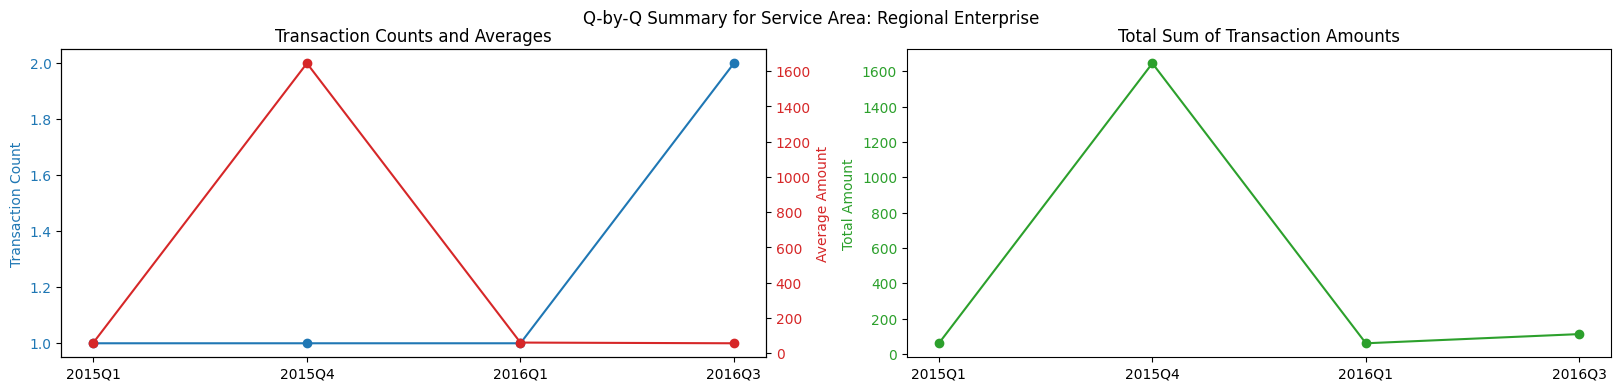

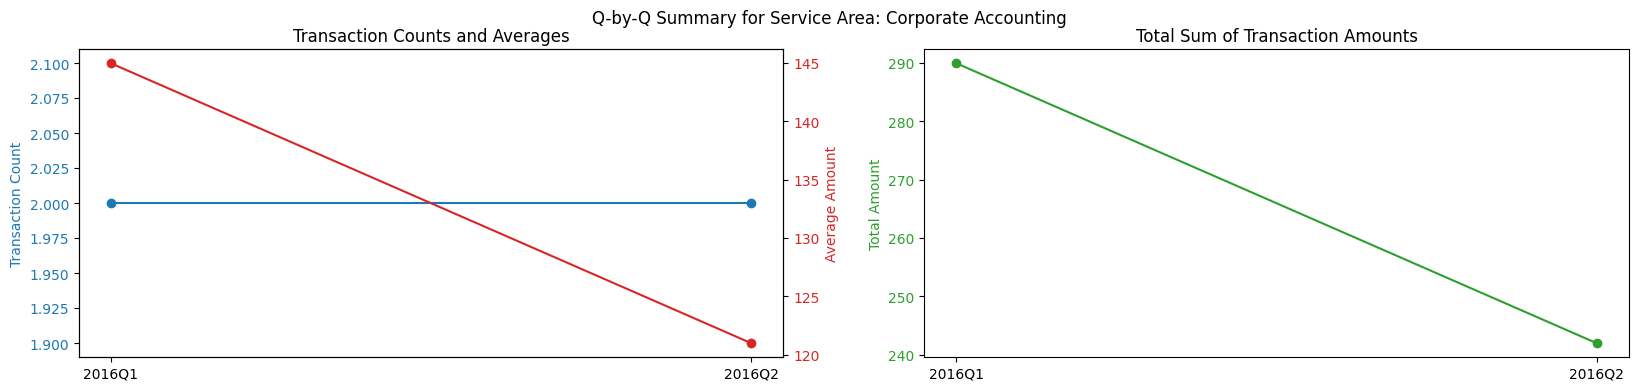

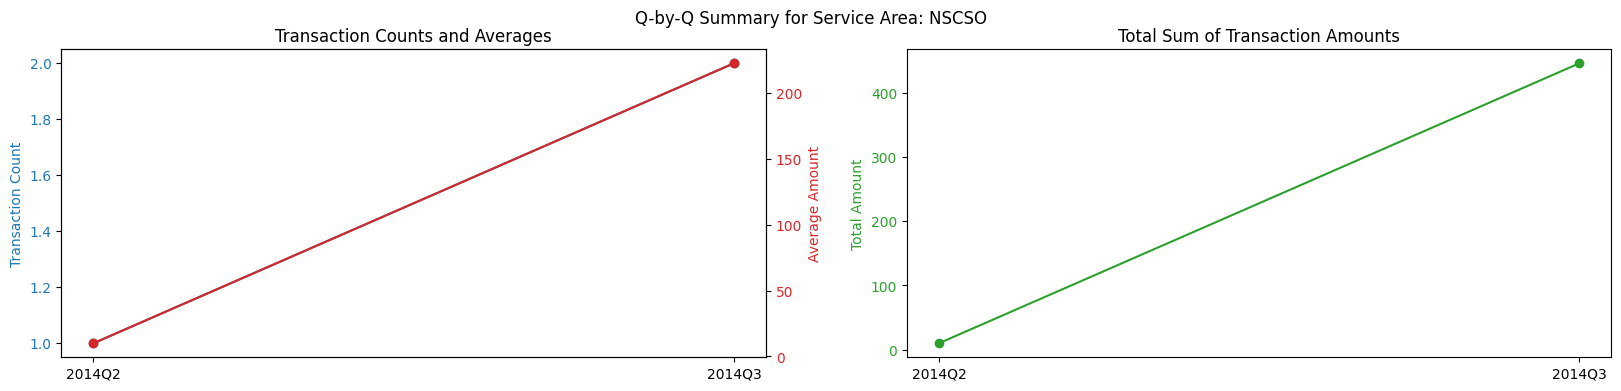

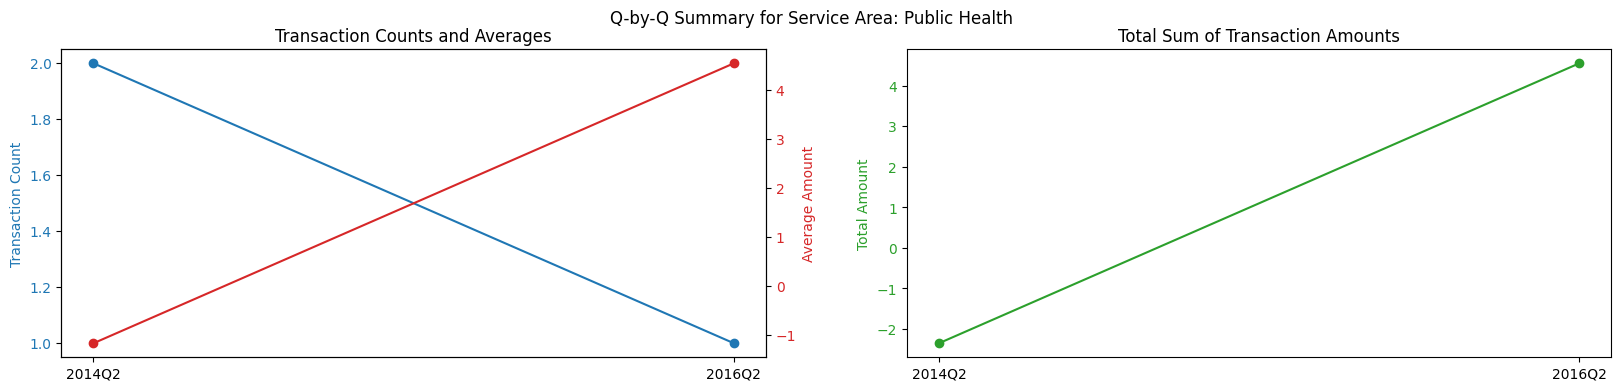

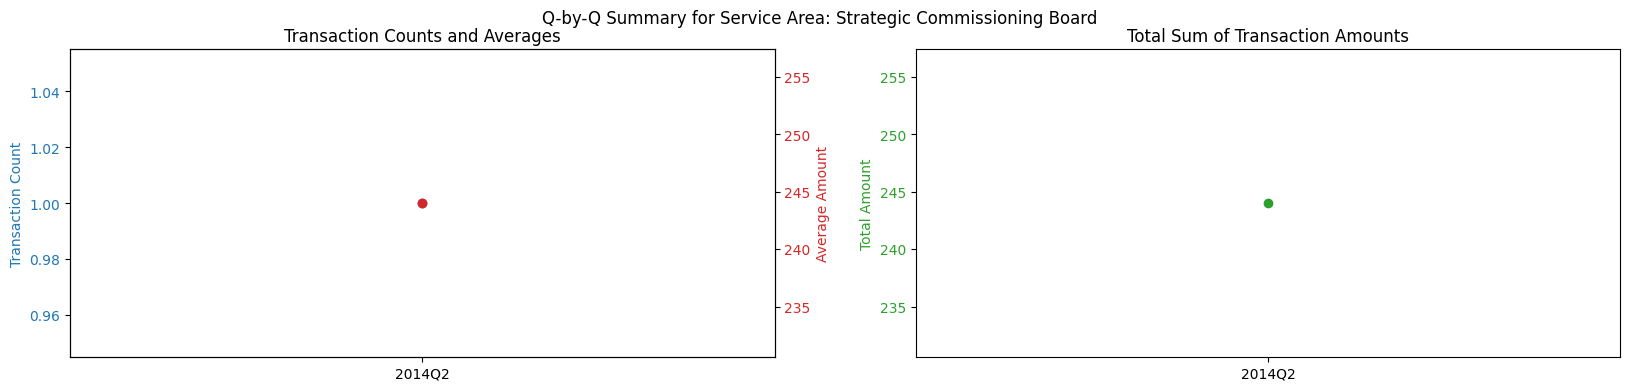

In [56]:
# Visualize the transaction counts, averages, and total sum of transaction amounts by Service Area
# The Service Area order is by total transaction counts (largest to smallest).
for service_area in df['Service Area'].value_counts().index.to_list():
    service_area_data = summary[summary['Service Area'] == service_area]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    
    # Left plot: Transaction counts and averages
    #ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Transaction Count', color='tab:blue')
    ax1.plot(service_area_data['Quarter'].astype(str), service_area_data['transaction_count'], marker='o', color='tab:blue', label='Transaction Count')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax3 = ax1.twinx()
    ax3.set_ylabel('Average Amount', color='tab:red')
    ax3.plot(service_area_data['Quarter'].astype(str), service_area_data['average_amount'], marker='o', color='tab:red', label='Average Amount')
    ax3.tick_params(axis='y', labelcolor='tab:red')
    
    # Right plot: Total transaction amounts
    #ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Total Amount', color='tab:green')
    ax2.plot(service_area_data['Quarter'].astype(str), service_area_data['total_amount'], marker='o', color='tab:green', label='Total Amount')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    
    # Setting titles and legends
    ax1.set_title('Transaction Counts and Averages')
    ax2.set_title('Total Sum of Transaction Amounts')
    fig.suptitle(f'Q-by-Q Summary for Service Area: {service_area}', fontsize=12)

    plt.show()

# Task 2: Detect Significant Changes in Spending Behavior

In [57]:
# Significant changes by Service Area
summary['quarterly_change'] = summary.groupby('Service Area')['total_amount'].pct_change()
summary['rolling_avg'] = summary.groupby('Service Area')['total_amount'].rolling(window=4).mean().reset_index(level=0, drop=True)

# identify spikes and permanent increases for total sum of transaction amounts for Service Areas
# threshold for spikes set as abs(0.5). Threshold for permanent increases as 20% of 4-quarter rolling avg.
spikes = summary[summary['quarterly_change'].abs() > 0.5]  
permanent_increases = summary[summary['total_amount'] > summary['rolling_avg'] * 1.2]

# We can also apply these for transaction counts and for transaction averages to break down the components of total sum of transaction amounts.

In [58]:
spikes

Service Area Quarter  transaction_count  total_amount  \
6            Adults and Communities  2015Q4                 19       3039.03   
9            Adults and Communities  2016Q3                 12        414.43   
12                        Assurance  2015Q2                 52       2962.10   
15                        Assurance  2016Q1                 29        849.28   
16                        Assurance  2016Q2                 60       9510.24   
17                        Assurance  2016Q3                 29       -532.89   
27    Children's Education & Skills  2016Q2                  5        475.88   
28    Children's Education & Skills  2016Q3                  4        118.18   
38           Children's Service DSG  2014Q4                 32       5213.69   
41           Children's Service DSG  2015Q3                 20       2776.49   
42           Children's Service DSG  2015Q4                 59       4530.62   
47               Childrens Services  2014Q3                331      23999.07   
48               Childrens Services  2014Q4                 20       1264.11   
51                    Commissioning  2015Q1                 29       5189.44   
54                    Commissioning  2015Q4                 40       8602.64   
57                    Commissioning  2016Q3                 11       2485.54   
62           Customer Support Group  2015Q1                 14      18900.97   
63           Customer Support Group  2015Q2                 11      34636.00   
67           Customer Support Group  2016Q2                 10      28988.78   
68           Customer Support Group  2016Q3                  6      11972.00   
71   Deputy Chief Operating Officer  2014Q4                 24        848.91   
77                       Governance  2014Q3                  3       1176.96   
78                       Governance  2014Q4                  1         53.94   
80            Internal Audit & CAFT  2014Q3                  7        192.95   
83                            NSCSO  2014Q3                  2        445.50   
85         Parking & Infrastructure  2015Q1                  1         28.43   
86         Parking & Infrastructure  2015Q4                  1        159.67   
87         Parking & Infrastructure  2016Q2                  1        500.00   
89                    Public Health  2016Q2                  1          4.55   
91              Regional Enterprise  2015Q4                  1       1645.00   
92              Regional Enterprise  2016Q1                  1         60.00   
93              Regional Enterprise  2016Q3                  2        112.00   
97                     Street Scene  2014Q4                 12       1331.55   
99                      Streetscene  2015Q1                 37       5548.83   
101                     Streetscene  2015Q3                 72      14608.48   
102                     Streetscene  2015Q4                 36       5390.81   
104                     Streetscene  2016Q2                 37       8929.61   

     average_amount  quarterly_change  rolling_avg  
6        159.948947          0.857768    1970.0350  
9         34.535833         -0.886744    2395.3000  
12        56.963462         42.915493          NaN  
15        29.285517         -0.597500    2045.9175  
16       158.504000         10.198003    3682.9525  
17       -18.375517         -1.056033    2984.1600  
27        95.176000         -0.935411    7434.2350  
28        29.545000         -0.751660    4769.3500  
38       162.927812          0.710669          NaN  
41       138.824500          0.799095    3141.0400  
42        76.790169          0.631780    2970.2725  
47        72.504743         -0.638236          NaN  
48        63.205500         -0.947327          NaN  
51       178.946207          0.514984          NaN  
54       215.066000          1.528812    4992.5550  
57       225.958182         -0.662763    6723.3025  
62      1350.069286          2.516257          NaN  
63      3148.727273         

In [59]:
permanent_increases

Service Area Quarter  transaction_count  total_amount  \
6        Adults and Communities  2015Q4                 19       3039.03   
8        Adults and Communities  2016Q2                 25       3659.22   
13                    Assurance  2015Q3                 39       2262.28   
16                    Assurance  2016Q2                 60       9510.24   
32   Children's Family Services  2015Q3                748      56547.95   
42       Children's Service DSG  2015Q4                 59       4530.62   
43       Children's Service DSG  2016Q1                 31       4457.30   
54                Commissioning  2015Q4                 40       8602.64   
55                Commissioning  2016Q1                 62       8434.73   
67       Customer Support Group  2016Q2                 10      28988.78   
87     Parking & Infrastructure  2016Q2                  1        500.00   
101                 Streetscene  2015Q3                 72      14608.48   

     average_amount  quarterly_change  rolling_avg  
6        159.948947          0.857768    1970.0350  
8        146.368800          0.482354    2700.6550  
13        58.007179         -0.236258    1349.2925  
16       158.504000         10.198003    3682.9525  
32        75.598864          0.315405   43226.0625  
42        76.790169          0.631780    2970.2725  
43       143.783871         -0.016183    3326.9200  
54       215.066000          1.528812    4992.5550  
55       136.044032         -0.019518    5803.8775  
67      2898.878000          0.759795   19451.4450  
87       500.000000          2.131459     195.2300  
101      202.895556          4.214093    6259.3200

In [60]:
# Significant changes by GL Account
summary_acc = df.groupby(['Acc Name', 'Quarter']).agg(
    transaction_count=('Amount', 'count'),
    total_amount=('Amount', 'sum'),
    average_amount=('Amount', 'mean')
).reset_index()

In [61]:
summary_acc.head()

Acc Name Quarter  transaction_count  total_amount  average_amount
0  Advertising  2014Q2                  8        608.71        76.08875
1  Advertising  2014Q3                  4        213.19        53.29750
2  Advertising  2014Q4                  4        194.53        48.63250
3  Advertising  2015Q1                  3        145.50        48.50000
4  Advertising  2015Q2                  1         58.25        58.25000

In [62]:
summary_acc['quarterly_change'] = summary_acc.groupby('Acc Name')['total_amount'].pct_change()
summary_acc['rolling_avg'] = summary_acc.groupby('Acc Name')['total_amount'].rolling(window=4).mean().reset_index(level=0, drop=True)

# identify spikes and permanent increases for total sum of transaction amounts for GL Accounts
# threshold for spikes set as abs(0.5). Threshold for permanent increases as 20% of 4-quarter rolling avg.
spikes_acc = summary_acc[summary_acc['quarterly_change'].abs() > 0.5]  
permanent_increases_acc = summary_acc[summary_acc['total_amount'] > summary_acc['rolling_avg'] * 1.2]

In [63]:
spikes_acc

Acc Name Quarter  transaction_count  total_amount  \
1              Advertising  2014Q3                  4        213.19   
4              Advertising  2015Q2                  1         58.25   
5              Advertising  2015Q3                  2       2955.60   
11   Books-CDs-Audio-Video  2015Q2                 37       1381.95   
12   Books-CDs-Audio-Video  2015Q3                 12        223.11   
..                     ...     ...                ...           ...   
337  Vehicle Running Costs  2016Q3                  4         46.00   
341             Venue Hire  2015Q3                  1         60.00   
344             Venue Hire  2016Q2                  1       4342.20   
346         Water Services  2015Q3                  1         35.91   
347         Water Services  2015Q4                  1        235.70   

     average_amount  quarterly_change  rolling_avg  
1           53.2975         -0.649768          NaN  
4           58.2500         -0.599656     152.8675  
5         1477.8000         49.739914     838.4700  
11          37.3500         -0.656575    3360.0350  
12          18.5925         -0.838554    2598.1850  
..              ...               ...          ...  
337         11.5000         -0.994014    3710.8500  
341         60.0000          0.666667      48.7500  
344       4342.2000         71.370000    1134.9250  
346         35.9100         -0.840158          NaN  
347        235.7000          5.563631          NaN  

[147 rows x 7 columns]

In [64]:
#spikes_acc.to_excel('spikes_GL.xlsx')

In [65]:
permanent_increases_acc

Acc Name Quarter  transaction_count  total_amount  \
5                       Advertising  2015Q3                  2       2955.60   
14            Books-CDs-Audio-Video  2016Q1                 30       2622.06   
34   Cleaning and domestic material  2015Q4                 75       2443.38   
41   Clothing - Protective Clothing  2015Q3                  1        124.00   
43   Clothing - Protective Clothing  2016Q2                  2        113.00   
48              Conference Expenses  2015Q4                  5        941.00   
49              Conference Expenses  2016Q1                  7       2633.50   
66         E19 - Learning Resources  2015Q4                 22        637.85   
75   Education CFR Administrative S  2016Q1                 16       1415.91   
88   Equipment and Materials Purcha  2015Q3                217      20016.93   
97   Equipment and Materials Repair  2015Q2                  6       1499.24   
123         General Office Expenses  2015Q2                  7       1811.53   
127         General Office Expenses  2016Q2                 12        781.90   
139              Hardware Purchases  2016Q1                  3        123.26   
140              Hardware Purchases  2016Q2                  1        136.01   
156            Legal and Court Fees  2016Q2                  9      28758.99   
162          Miscellaneous Expenses  2015Q2                 68       6518.35   
166          Miscellaneous Expenses  2016Q2                 61       8298.27   
183  Other Indirect Employee Expens  2015Q2                  5        475.77   
185  Other Indirect Employee Expens  2015Q4                  6        737.59   
193                  Other Services  2015Q2                 52       6184.17   
194                  Other Services  2015Q3                 78       8615.89   
205  Other Transfer Payments to Soc  2015Q4                 67       4829.61   
207  Other Transfer Payments to Soc  2016Q2                 99      12943.32   
214             Other Vehicle Costs  2016Q2                  5        575.83   
241           Professional Services  2015Q1                  5       3639.18   
251                    Publications  2015Q2                 11        187.86   
252                    Publications  2015Q3                 17        831.36   
253                    Publications  2015Q4                 19       1564.23   
267                      Stationery  2015Q3                 16       1670.40   
268                      Stationery  2015Q4                 31       1320.49   
278                   Subscriptions  2015Q4                  8       1005.00   
279                   Subscriptions  2016Q1                 13       1832.85   
281                   Subscriptions  2016Q3                  9       2002.15   
308                        Training  2015Q3                 22       5457.35   
309                        Training  2015Q4                 24       5620.84   
316          Transport Hire Charges  2015Q2                  2        330.00   
317          Transport Hire Charges  2016Q2                  1        306.00   
331           Vehicle Running Costs  2015Q1                 10       1366.58   
332           Vehicle Running Costs  2015Q2                  5       1770.50   
333           Vehicle Running Costs  2015Q3                 50      11527.49   
341                      Venue Hire  2015Q3                  1         60.00   
342                      Venue Hire  2015Q4                  2         77.50   
344                      Venue Hire  2016Q2                  1       4342.20   
348                  Water Services  2016Q1                  2        272.99   

     average_amount  quarterly_change  rolling_avg  
5       1477.800000         49.739914     838.4700  
14        87.402000          0.855616    1410.0400  
34        32.578400          0.388844    1845.1425  
41       124.000000          0.723180      76.1750  
43        56.500000          4.681247      82.2125  
48       188.200000         

In [66]:
#permanent_increases_acc.to_excel('pincreases_GL.xlsx')

# Task 3: Grouping Similar Service Areas

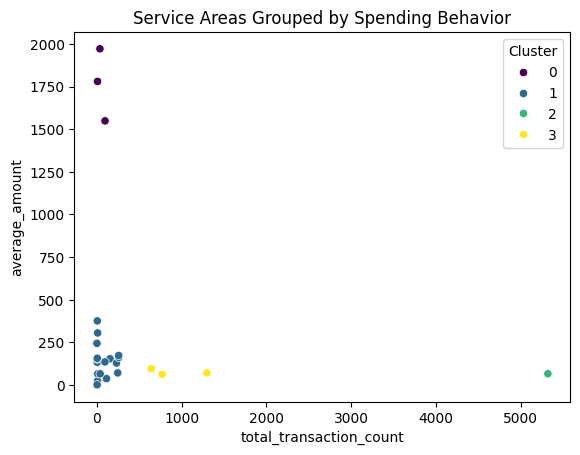

In [67]:
# group similar service areas using K-mean clustering
from sklearn.cluster import KMeans

service_area_stats = df.groupby('Service Area').agg(
    total_transaction_count=('Amount', 'count'),
    total_amount=('Amount', 'sum'),
    average_amount=('Amount', 'mean')
).reset_index()

# clustering using K-Means
kmeans = KMeans(n_clusters=4) # 4 clusters look good in this case 
service_area_stats['Cluster'] = kmeans.fit_predict(service_area_stats[['total_transaction_count', 'average_amount']])

# visualize results
sns.scatterplot(data=service_area_stats, x='total_transaction_count', y='average_amount', hue='Cluster', palette='viridis')
plt.title('Service Areas Grouped by Spending Behavior')
plt.show()

In [68]:
service_area_stats.sort_values('Cluster')

Service Area  total_transaction_count  total_amount  \
11          Customer Support Group                       96     148690.06   
2               CSG Managed Budget                       36      70986.34   
15                      Governance                        8      14242.50   
21   Strategic Commissioning Board                        1        244.00   
20             Regional Enterprise                        5       1877.00   
19                   Public Health                        3          2.20   
18        Parking & Infrastructure                        5        780.92   
17                           NSCSO                        3        455.50   
16           Internal Audit & CAFT                       11        716.15   
13                       Education                       95      12815.14   
12  Deputy Chief Operating Officer                      113       4168.38   
0           Adults and Communities                      155      23750.09   
10            Corporate Accounting                        4        531.93   
9                 Control Accounts                        8        190.71   
8                    Commissioning                      258      41686.20   
7                       Commercial                        9       2743.05   
5           Children's Service DSG                      231      29658.46   
1                        Assurance                      246      17333.81   
22                    Street Scene                       39       2532.26   
23                     Streetscene                      257      44394.85   
4       Children's Family Services                     5318     348605.72   
14                 Family Services                      770      47977.99   
6               Childrens Services                     1297      91602.24   
3    Children's Education & Skills                      642      61251.77   

    average_amount  Cluster  
11     1548.854792        0  
2      1971.842778        0  
15     1780.312500        0  
21      244.000000        1  
20      375.400000        1  
19        0.733333        1  
18      156.184000        1  
17      151.833333        1  
16       65.104545        1  
13      134.896211        1  
12       36.888319        1  
0       153.226387        1  
10      132.982500        1  
9        23.838750        1  
8       161.574419        1  
7       304.783333        1  
5       128.391602        1  
1        70.462642        1  
22       64.929744        1  
23      172.742607        1  
4        65.552035        2  
14       62.309078        3  
6        70.626245        3  
3        95.407741        3

# Task 4: Anomaly Detection

### Isolation Forest

In [69]:
# isolation forest
from sklearn.ensemble import IsolationForest
df['anomaly_score'] = 0
for service_area in df['Service Area'].value_counts().index.to_list():
    indexes = df[df['Service Area']==service_area].index
    service_area_data = df[df['Service Area']==service_area][['Amount']]
    iso_forest = IsolationForest(contamination=0.02, random_state=68) # Assuming 2% anomalous
    df.loc[indexes, 'anomaly_score'] = iso_forest.fit_predict(service_area_data)
df['anomaly_flag'] = np.where(df['anomaly_score']==-1,'Yes','No')    

In [70]:
df['anomaly_flag'].value_counts()

anomaly_flag
No     9405
Yes     205
Name: count, dtype: int64

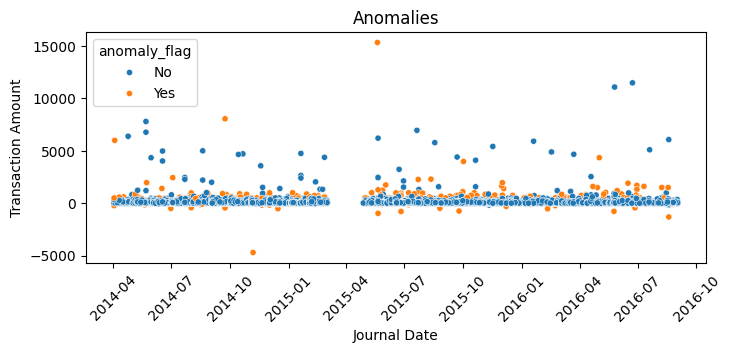

In [71]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, x='Journal Date', y='Amount', s=20, hue='anomaly_flag', palette='tab10')
plt.xlabel('Journal Date')
plt.ylabel('Transaction Amount')
plt.title('Anomalies')
plt.xticks(rotation=45)
plt.show()  

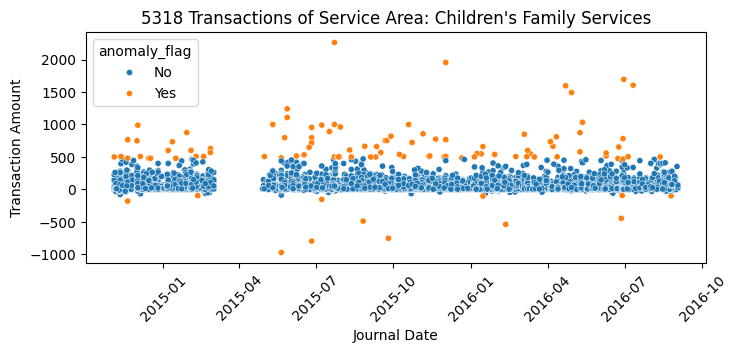

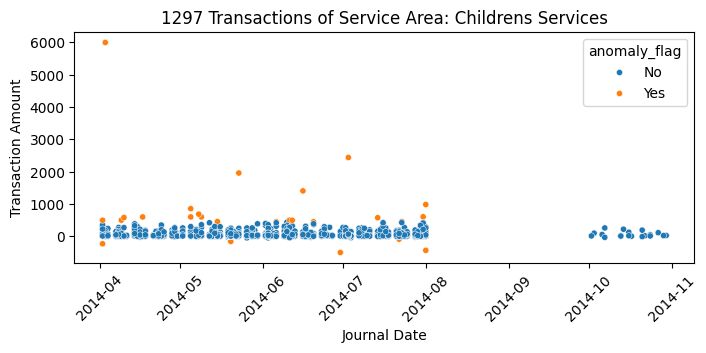

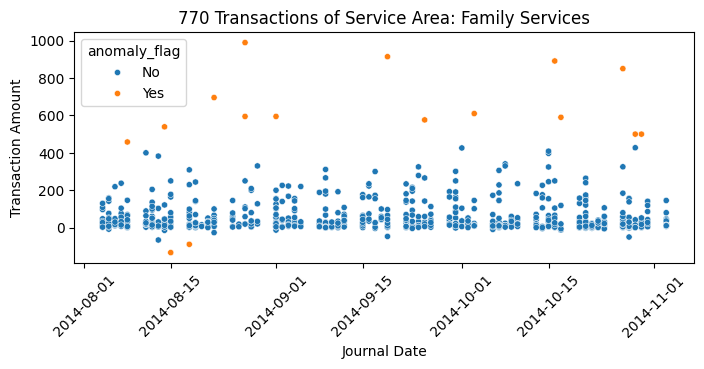

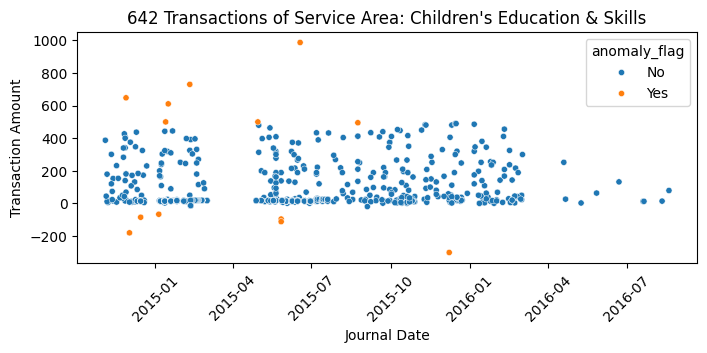

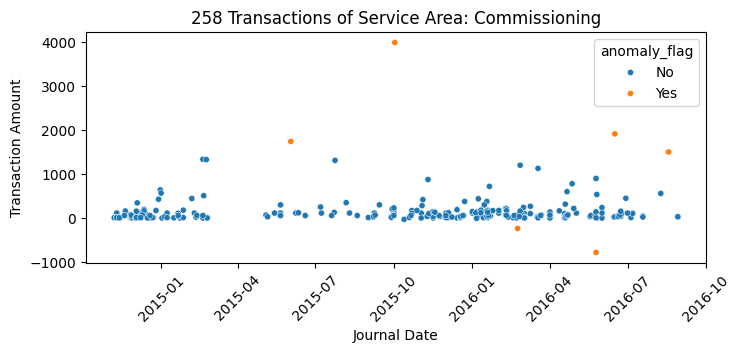

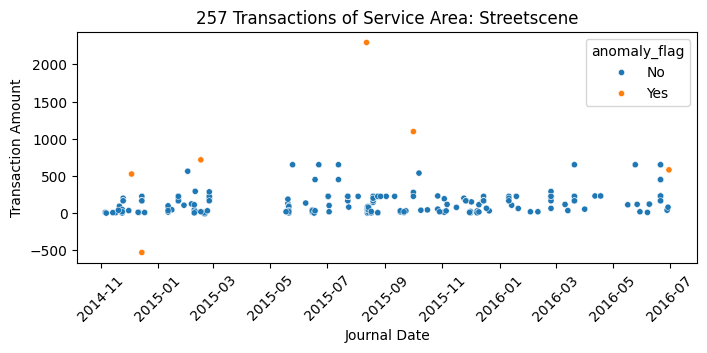

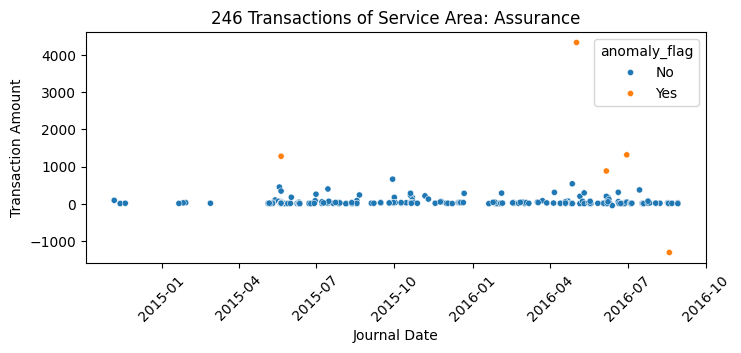

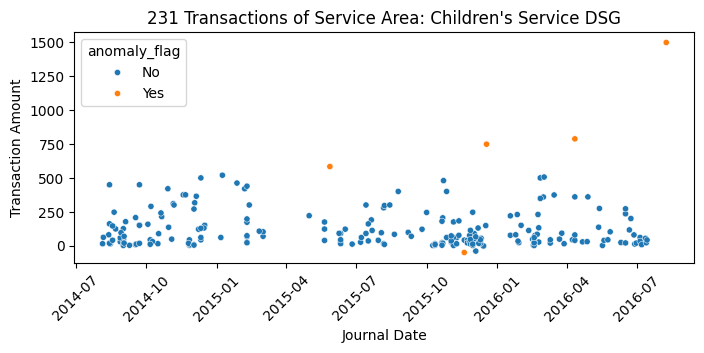

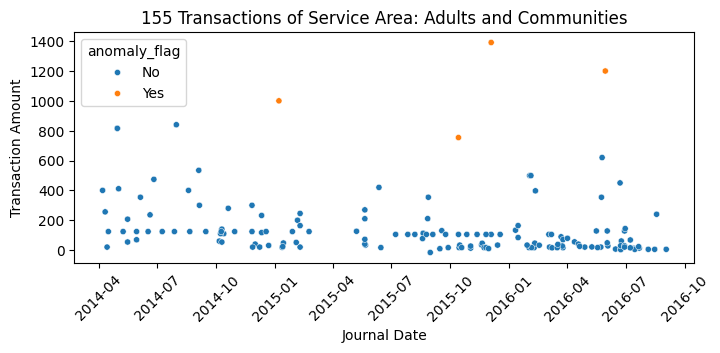

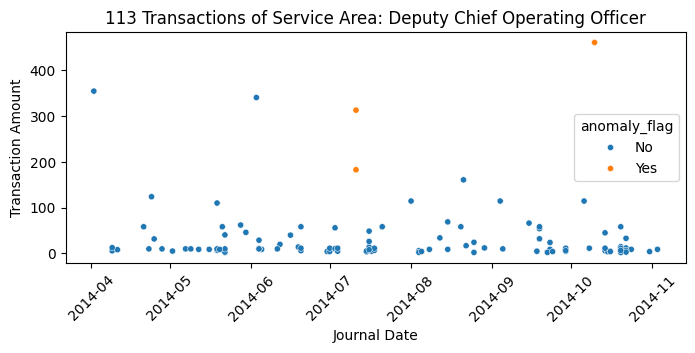

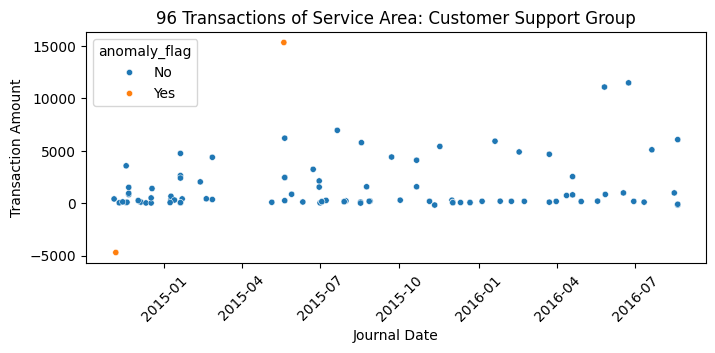

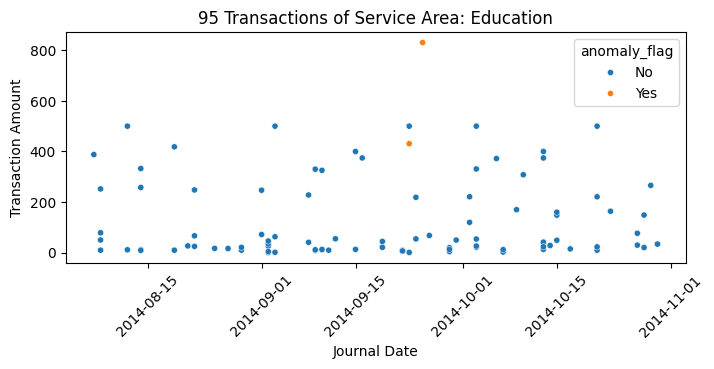

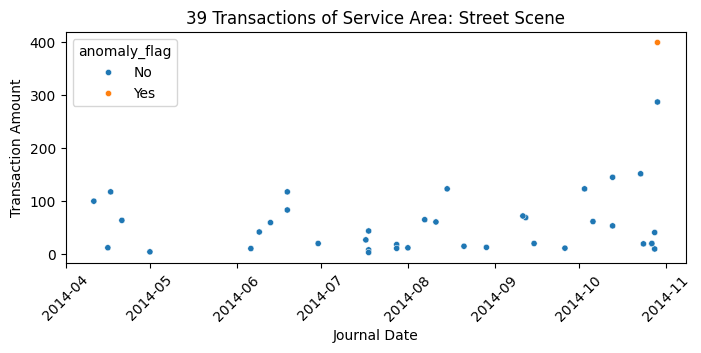

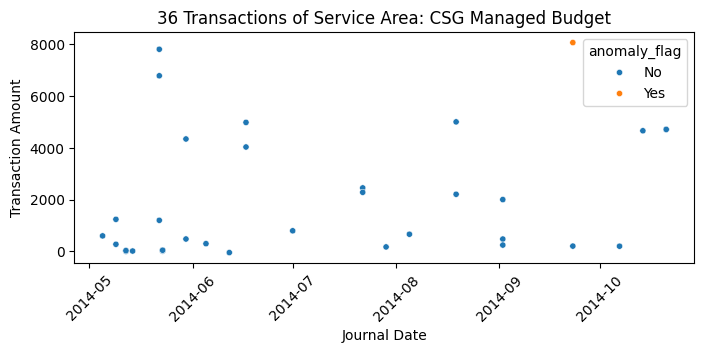

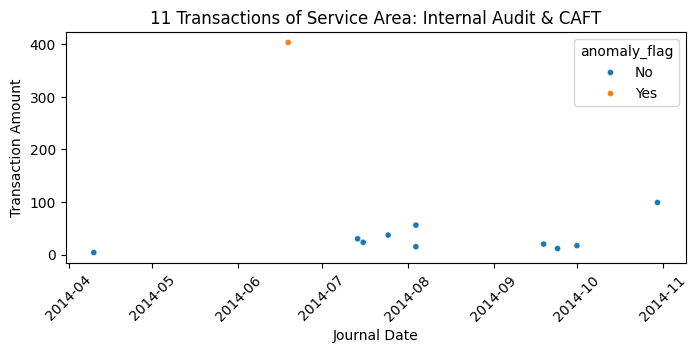

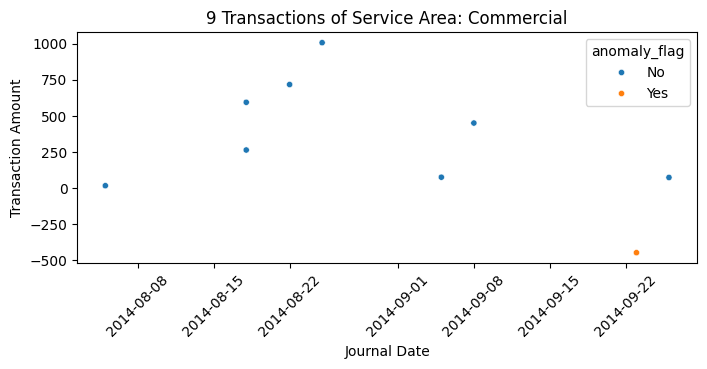

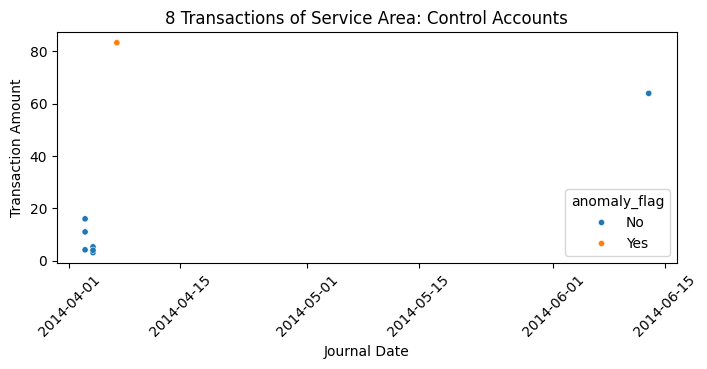

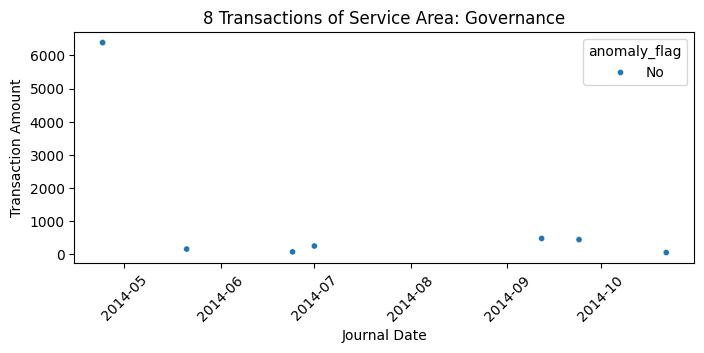

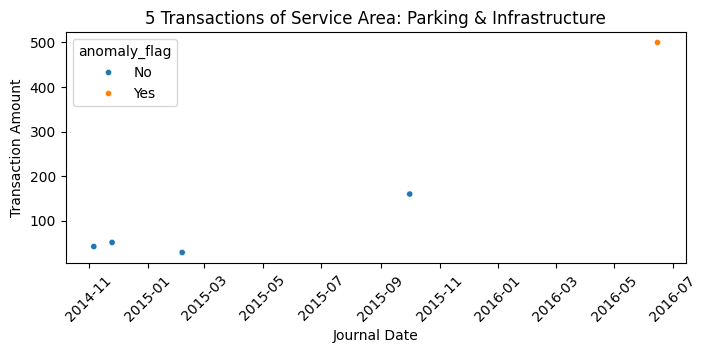

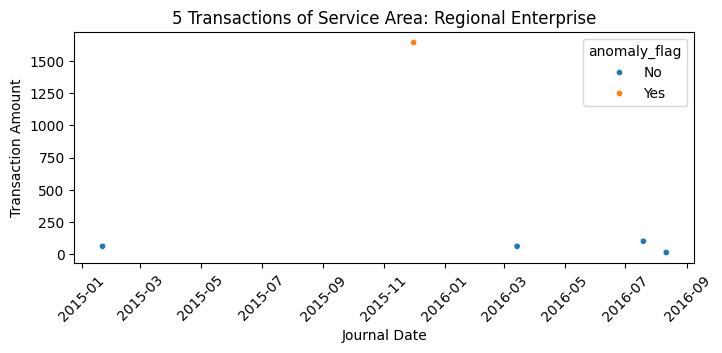

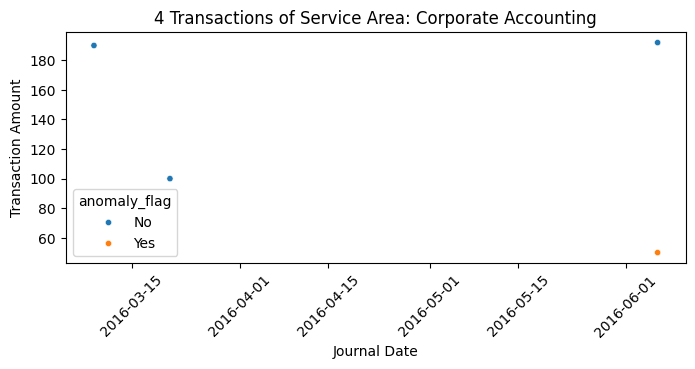

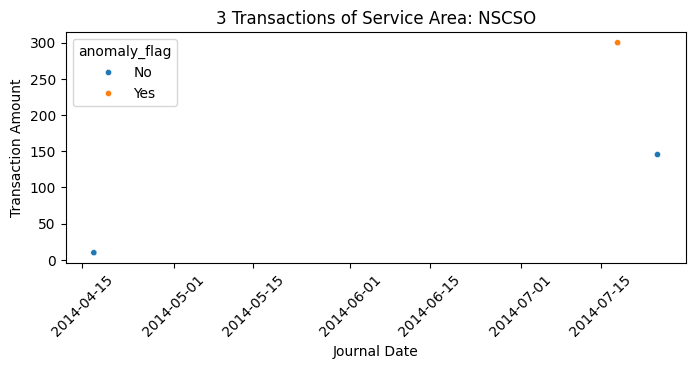

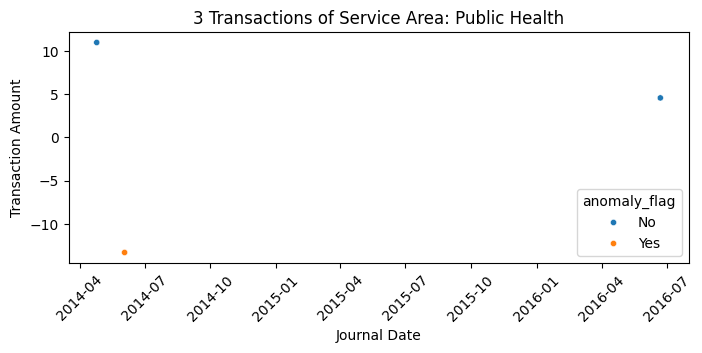

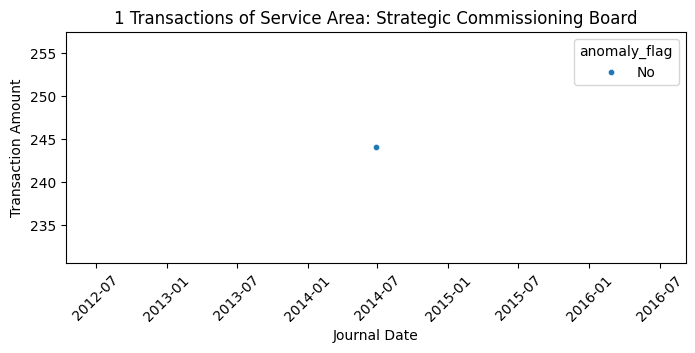

In [72]:
# plot anomalies by Service Area
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(8, 3))
    sns.scatterplot(data=df[df['Service Area']==service_area], x='Journal Date', y='Amount', s=20, hue='anomaly_flag', palette='tab10')
    plt.xlabel('Journal Date')
    plt.ylabel('Transaction Amount')
    plt.title(f'{len(df[df['Service Area']==service_area])} Transactions of Service Area: {service_area}')
    plt.xticks(rotation=45)
    plt.show()
    

### Z-Score Method

In [73]:
# function to detect outliers in normal data - z-score method
def detect_outliers_normal(data):
     
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    
    # Define threshold for identifying outliers (Z-score > 3 or Z-score < -3)
    threshold = 3
    outliers = np.abs(z_scores) > threshold
    
    # Map the outliers back to the original data scale
    outlier_data = data[outliers]
    return outlier_data

# function to detect outliers in log-normal data - z-score method
def detect_outliers_log_normal(data):
    log_data = np.log(data)
    
    mean = np.mean(log_data)
    std = np.std(log_data)
    z_scores = (log_data - mean) / std
    
    # Define threshold for identifying outliers (Z-score > 3 or Z-score < -3)
    threshold = 3
    outliers = np.abs(z_scores) > threshold
    
    # Map the outliers back to the original data scale
    outlier_data = data[outliers]
    return outlier_data

In [74]:
# find outliers for each Service Area using z-score with log-normal distribution
outlier_results_log_normal = {}

for service_area in df['Service Area'].value_counts().index.to_list():
    service_area_data = df[df['Service Area'] == service_area]['Amount']
    outliers = detect_outliers_log_normal(service_area_data)
    
    outlier_results_log_normal[service_area] = outliers
    #print(f"Outliers for {service_area}:")
    #print(outliers)
    #print("\n")

In [75]:
# find outliers for each Service Area using z-score with normal distribution
outlier_results_normal = {}

for service_area in df['Service Area'].value_counts().index.to_list():
    service_area_data = df[df['Service Area'] == service_area]['Amount']
    outliers = detect_outliers_normal(service_area_data)
    
    outlier_results_normal[service_area] = outliers
    #print(f"Outliers for {service_area}:")
    #print(outliers)
    #print("\n")

In [76]:
count = 0
for k, v in outlier_results_log_normal.items():
    count += len(v)
count

5

In [77]:
# Too few outliers with log-normal distribution. Let's see how many outliers with normal distribution.

In [78]:
count = 0
for k, v in outlier_results_normal.items():
    count += len(v)
count

172

In [79]:
outliers_index = []
for k, v in outlier_results_normal.items():
    outliers_index.extend(v.index)
#df.loc[outliers_index, :]    

In [80]:
df['anomaly_normal_flag'] = np.where(df.index.isin(outliers_index),'Yes','No')

In [81]:
#df[df['anomaly_normal_flag']=='Yes'].to_excel('anomalies.xlsx')

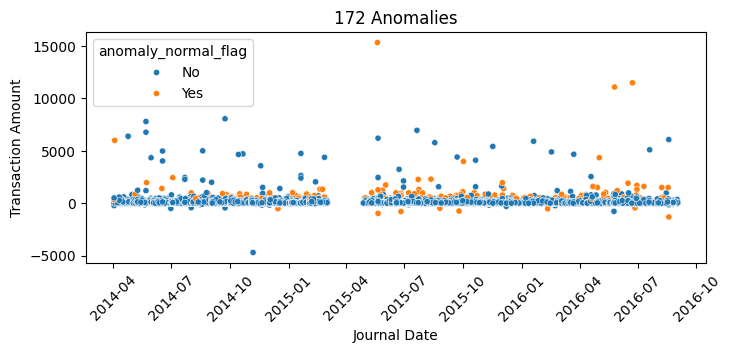

In [82]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, x='Journal Date', y='Amount', s=20, hue='anomaly_normal_flag', palette='tab10')
plt.xlabel('Journal Date')
plt.ylabel('Transaction Amount')
plt.title(f'{count} Anomalies')
plt.xticks(rotation=45)
plt.show()

### Visualize the anomalies by z-score method for normal distribution for each Service Area

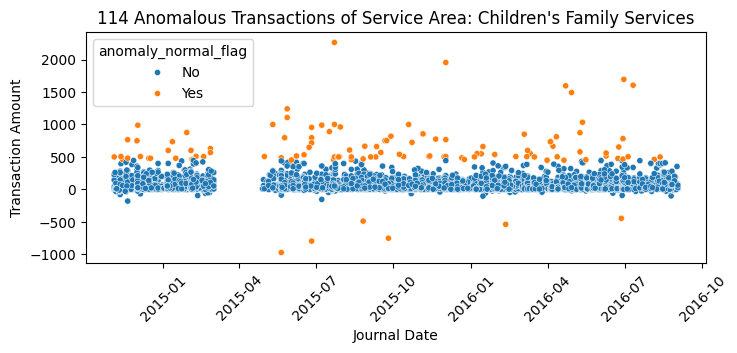

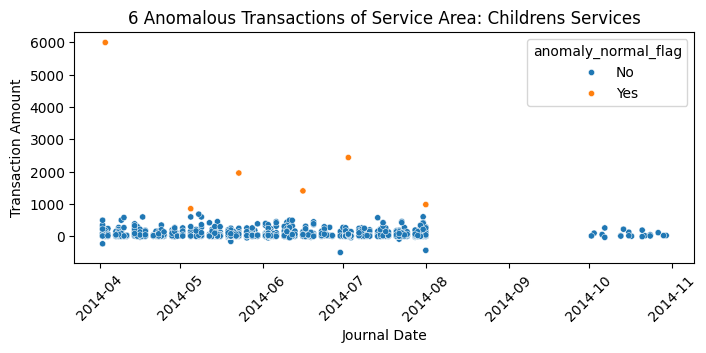

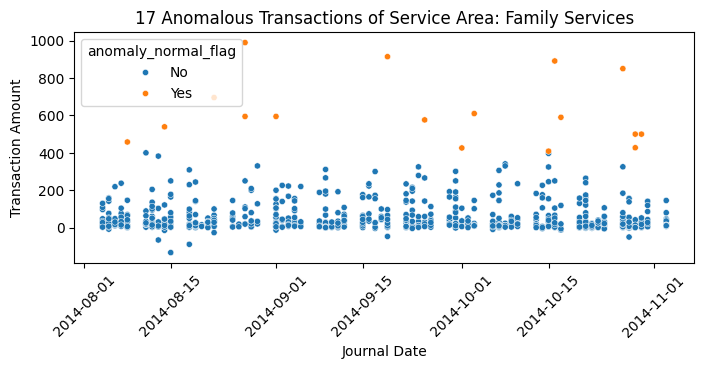

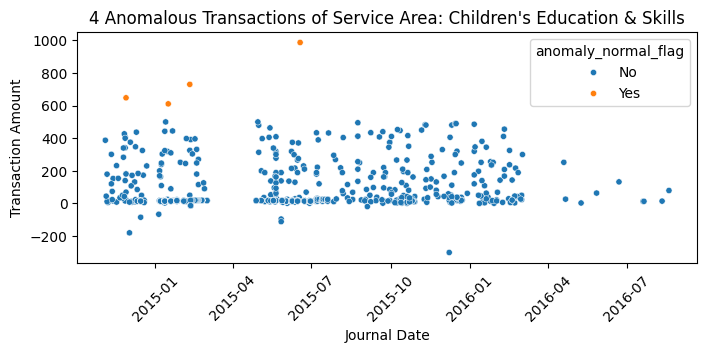

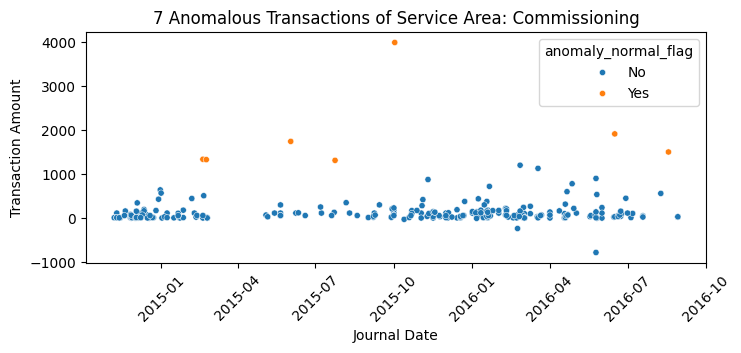

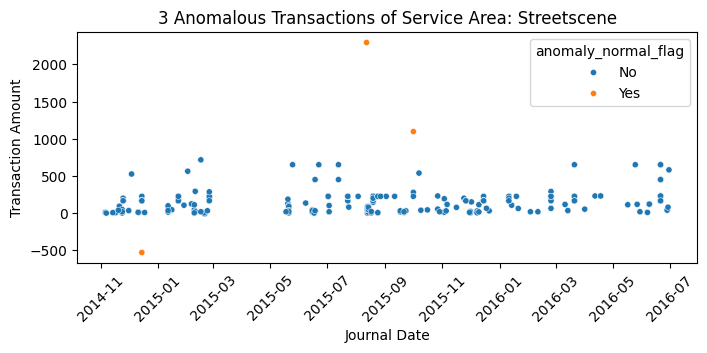

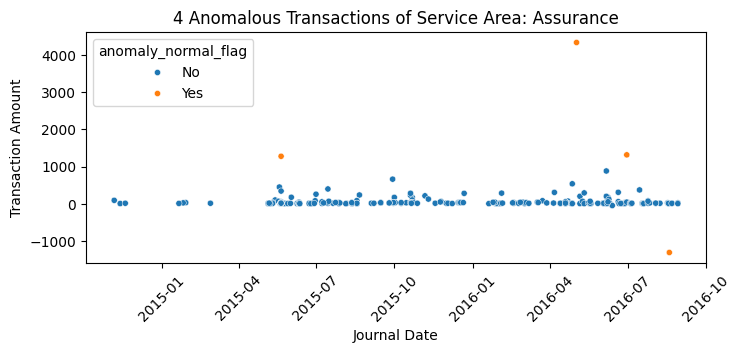

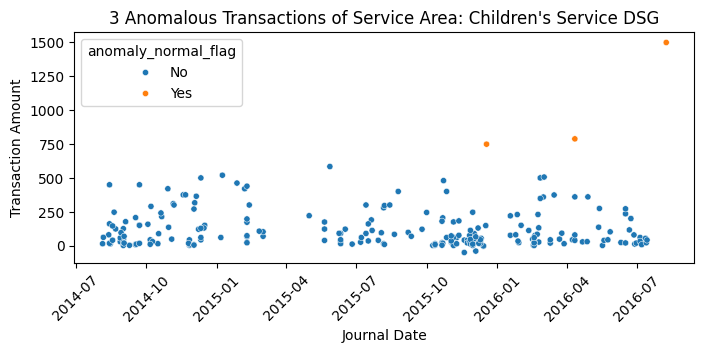

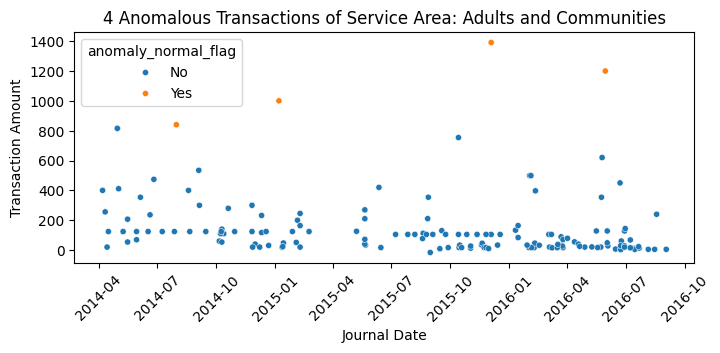

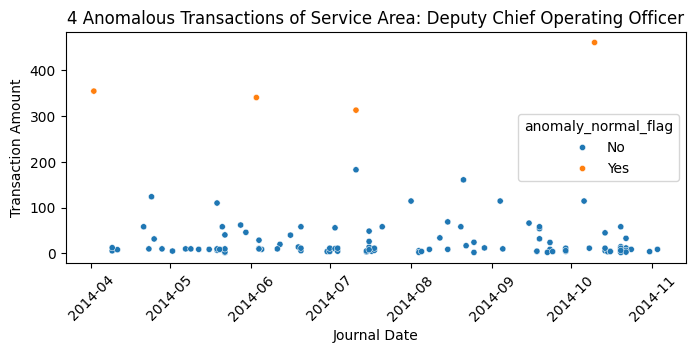

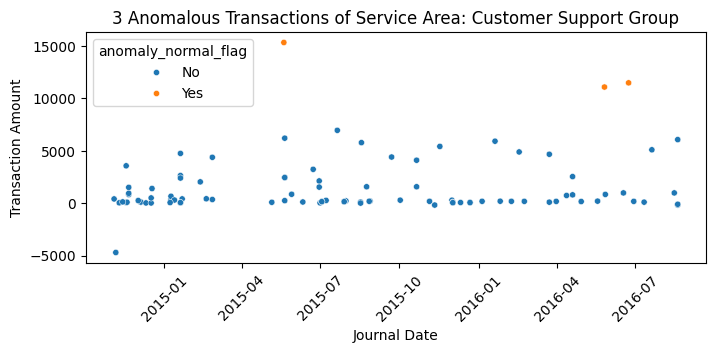

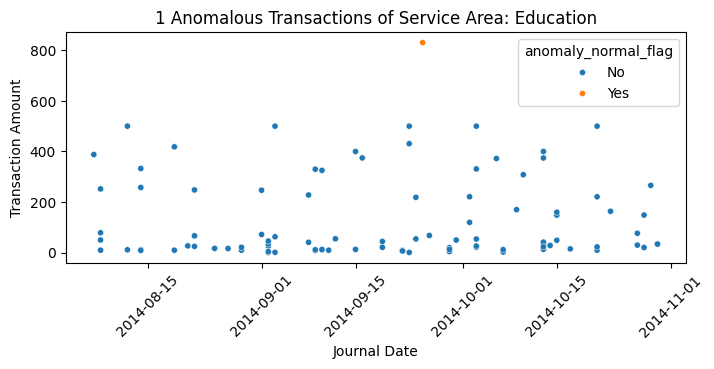

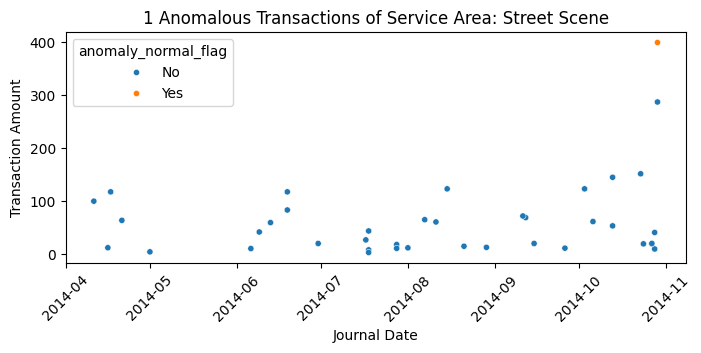

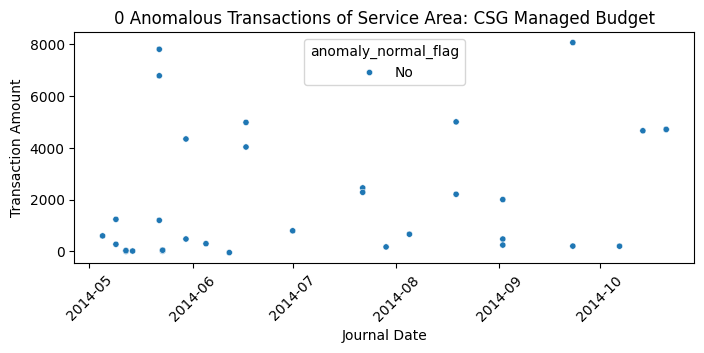

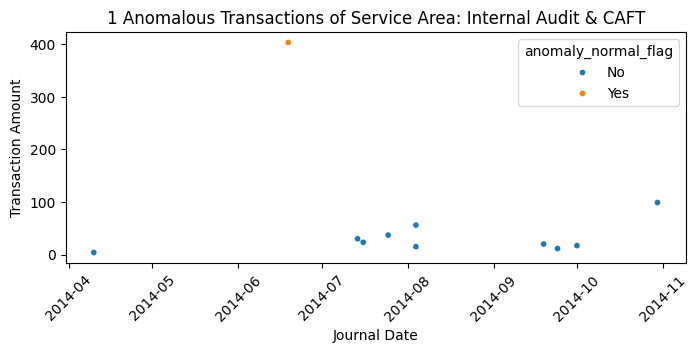

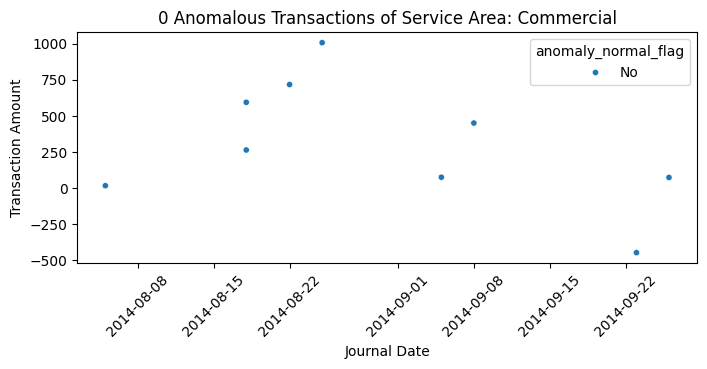

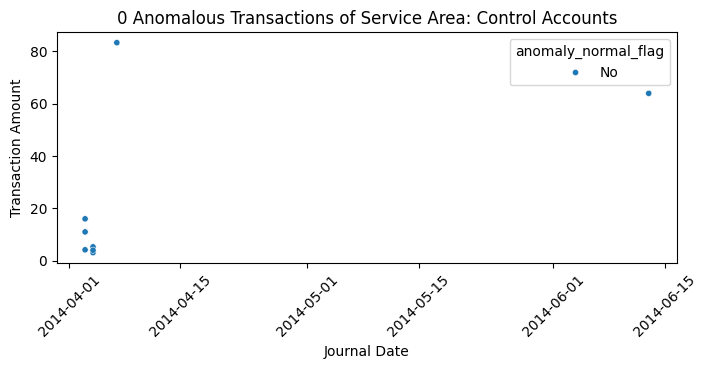

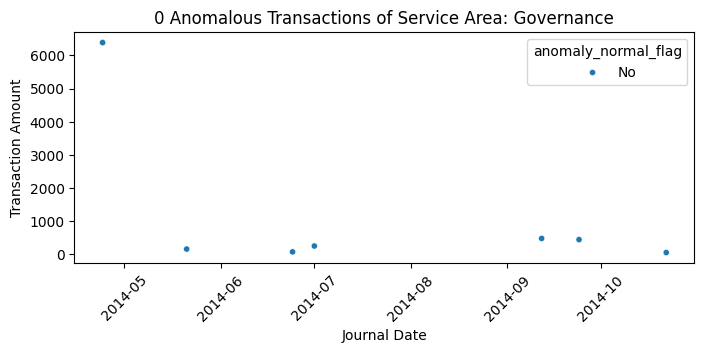

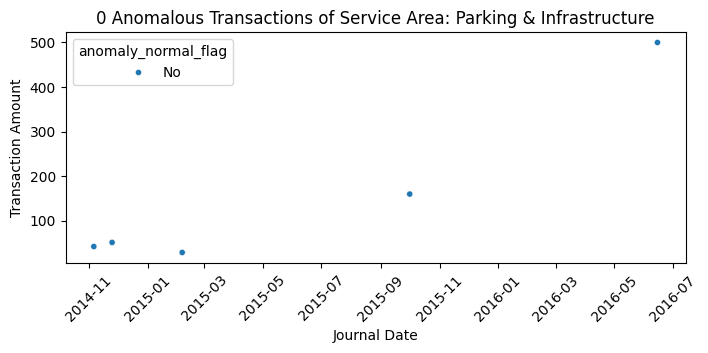

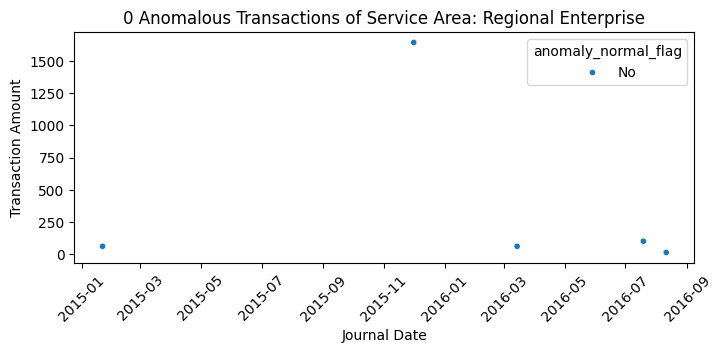

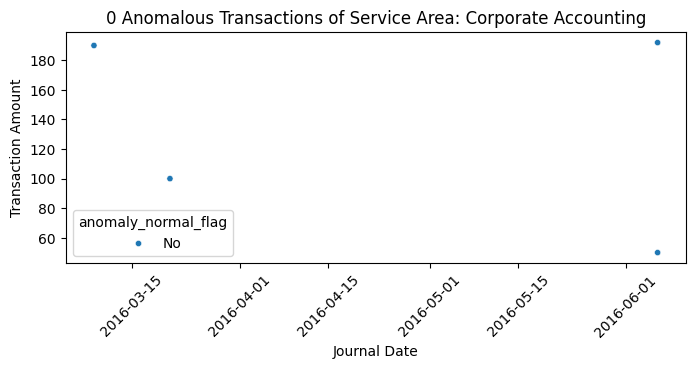

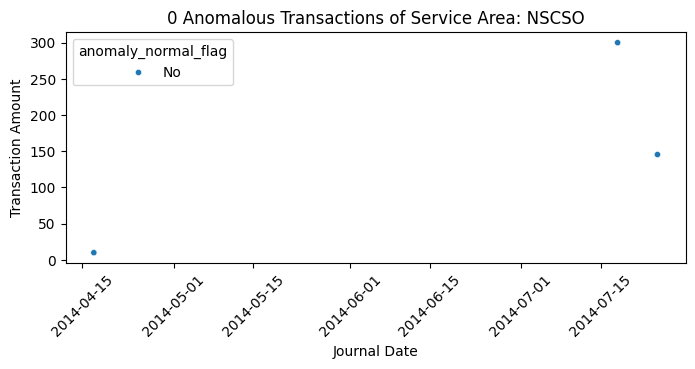

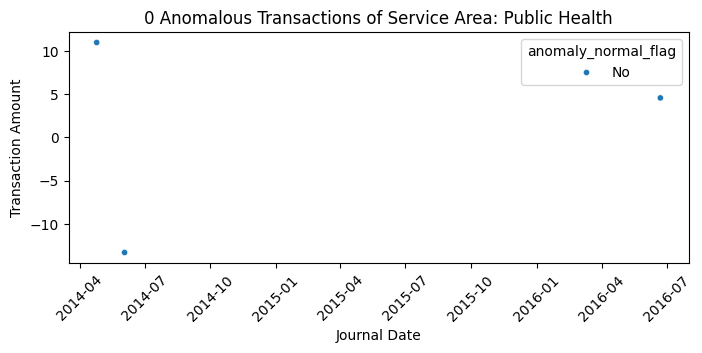

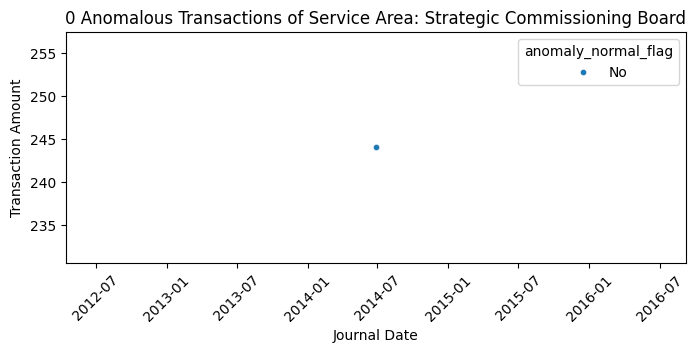

In [83]:
for service_area, v in outlier_results_normal.items():
    plt.figure(figsize=(8, 3))
    sns.scatterplot(data=df[df['Service Area']==service_area], x='Journal Date', y='Amount', s=20, hue='anomaly_normal_flag', palette='tab10')
    plt.xlabel('Journal Date')
    plt.ylabel('Transaction Amount')
    plt.title(f'{len(v)} Anomalous Transactions of Service Area: {service_area}')
    plt.xticks(rotation=45)
    plt.show()

### Display Anomalous Transactions by Service Area

In [84]:
from IPython.display import display, HTML

cols = ['Service Area','Acc Name','Creditor','Journal Date','Journal Reference','Amount','anomaly_normal_flag']

for service_area, v in outlier_results_normal.items():
    print(f'Service Area: "{service_area}" with {len(v)} anomalies:')
    display(HTML(df[(df['Service Area']==service_area) & (df['anomaly_normal_flag']=='Yes')][cols].to_html()))
    print('\n')

Service Area: "Children's Family Services" with 114 anomalies:




Service Area: "Childrens Services" with 6 anomalies:




Service Area: "Family Services" with 17 anomalies:




Service Area: "Children's Education & Skills" with 4 anomalies:




Service Area: "Commissioning" with 7 anomalies:




Service Area: "Streetscene" with 3 anomalies:




Service Area: "Assurance" with 4 anomalies:




Service Area: "Children's Service DSG" with 3 anomalies:




Service Area: "Adults and Communities" with 4 anomalies:




Service Area: "Deputy Chief Operating Officer" with 4 anomalies:




Service Area: "Customer Support Group" with 3 anomalies:




Service Area: "Education" with 1 anomalies:




Service Area: "Street Scene" with 1 anomalies:




Service Area: "CSG Managed Budget" with 0 anomalies:




Service Area: "Internal Audit & CAFT" with 1 anomalies:




Service Area: "Commercial" with 0 anomalies:




Service Area: "Control Accounts" with 0 anomalies:




Service Area: "Governance" with 0 anomalies:




Service Area: "Parking & Infrastructure" with 0 anomalies:




Service Area: "Regional Enterprise" with 0 anomalies:




Service Area: "Corporate Accounting" with 0 anomalies:




Service Area: "NSCSO" with 0 anomalies:




Service Area: "Public Health" with 0 anomalies:




Service Area: "Strategic Commissioning Board" with 0 anomalies:


### End of Workbook. With the corporate credt card transaction datasets, we have gone through data preprocessing, exploratory data analysis, summaries by service area, spending pattern/behaviour changes, service area clustering, and anomaly detection. Thank you for reading.